In [45]:
# Import the neccessary modules
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [46]:
# Read the dataset into a dataframe
path = r'C:\Users\satya\Documents\python_codes\All codes\Fire Prediction\Mine Fire Data.xlsx'
df = pd.read_excel(path, sheet_name = 'Combined1', engine = 'openpyxl')
# Drop some columns which is not relevant to the analysis (they are not numeric)
#cols_to_drop = ['Gas Station','Month', 'Status']
#cols_to_drop = ['Graham’s ratio','Day','Young’s ratio','CO/CO2 ratio','Jones & Trickett ratio', 'Willett’s ratio', 'Explosiveness']
cols_to_drop = ['Reference','GR']
df = df.drop(cols_to_drop, axis=1)
df.head()
df.info()
#print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   O2      142 non-null    float64
 1   CO      142 non-null    float64
 2   CH4     142 non-null    float64
 3   CO2     142 non-null    float64
 4   N2      142 non-null    float64
 5   Class   142 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 6.8 KB


In [38]:
# Extract the feature names
#feature_names = df.columns.tolist()

In [49]:
feature_names = ['$O_2$ (%)', 'CO (%)', '$CH_4$ (%)','$CO_2$ (%)','$N_2$ (%)', 'Class']
#feature_names = ['$O_2$ (%)', 'CO (%)', '$CH_4$ (%)','$CO_2$ (%)','$H_2$ (%)', '$N_2$ (%)', 'Class']

Descriptive Statistics:
               O2          CO         CH4         CO2          N2       Class
count  142.000000  142.000000  142.000000  142.000000  142.000000  142.000000
mean    11.021972    0.447371    1.186603    5.825998   77.624718    2.992958
std      6.483930    0.528196    1.749836    7.174462    5.157484    2.135470
min      1.130000    0.000000    0.000237    0.000016   65.240000    0.000000
25%      4.700000    0.000406    0.000491    0.026537   74.075000    0.000000
50%     12.015000    0.103300    0.001664    0.980540   78.160000    4.000000
75%     16.455000    0.942325    3.150000   13.625000   80.340000    5.000000
max     20.850000    1.620000    5.200000   26.000000   89.200000    5.000000


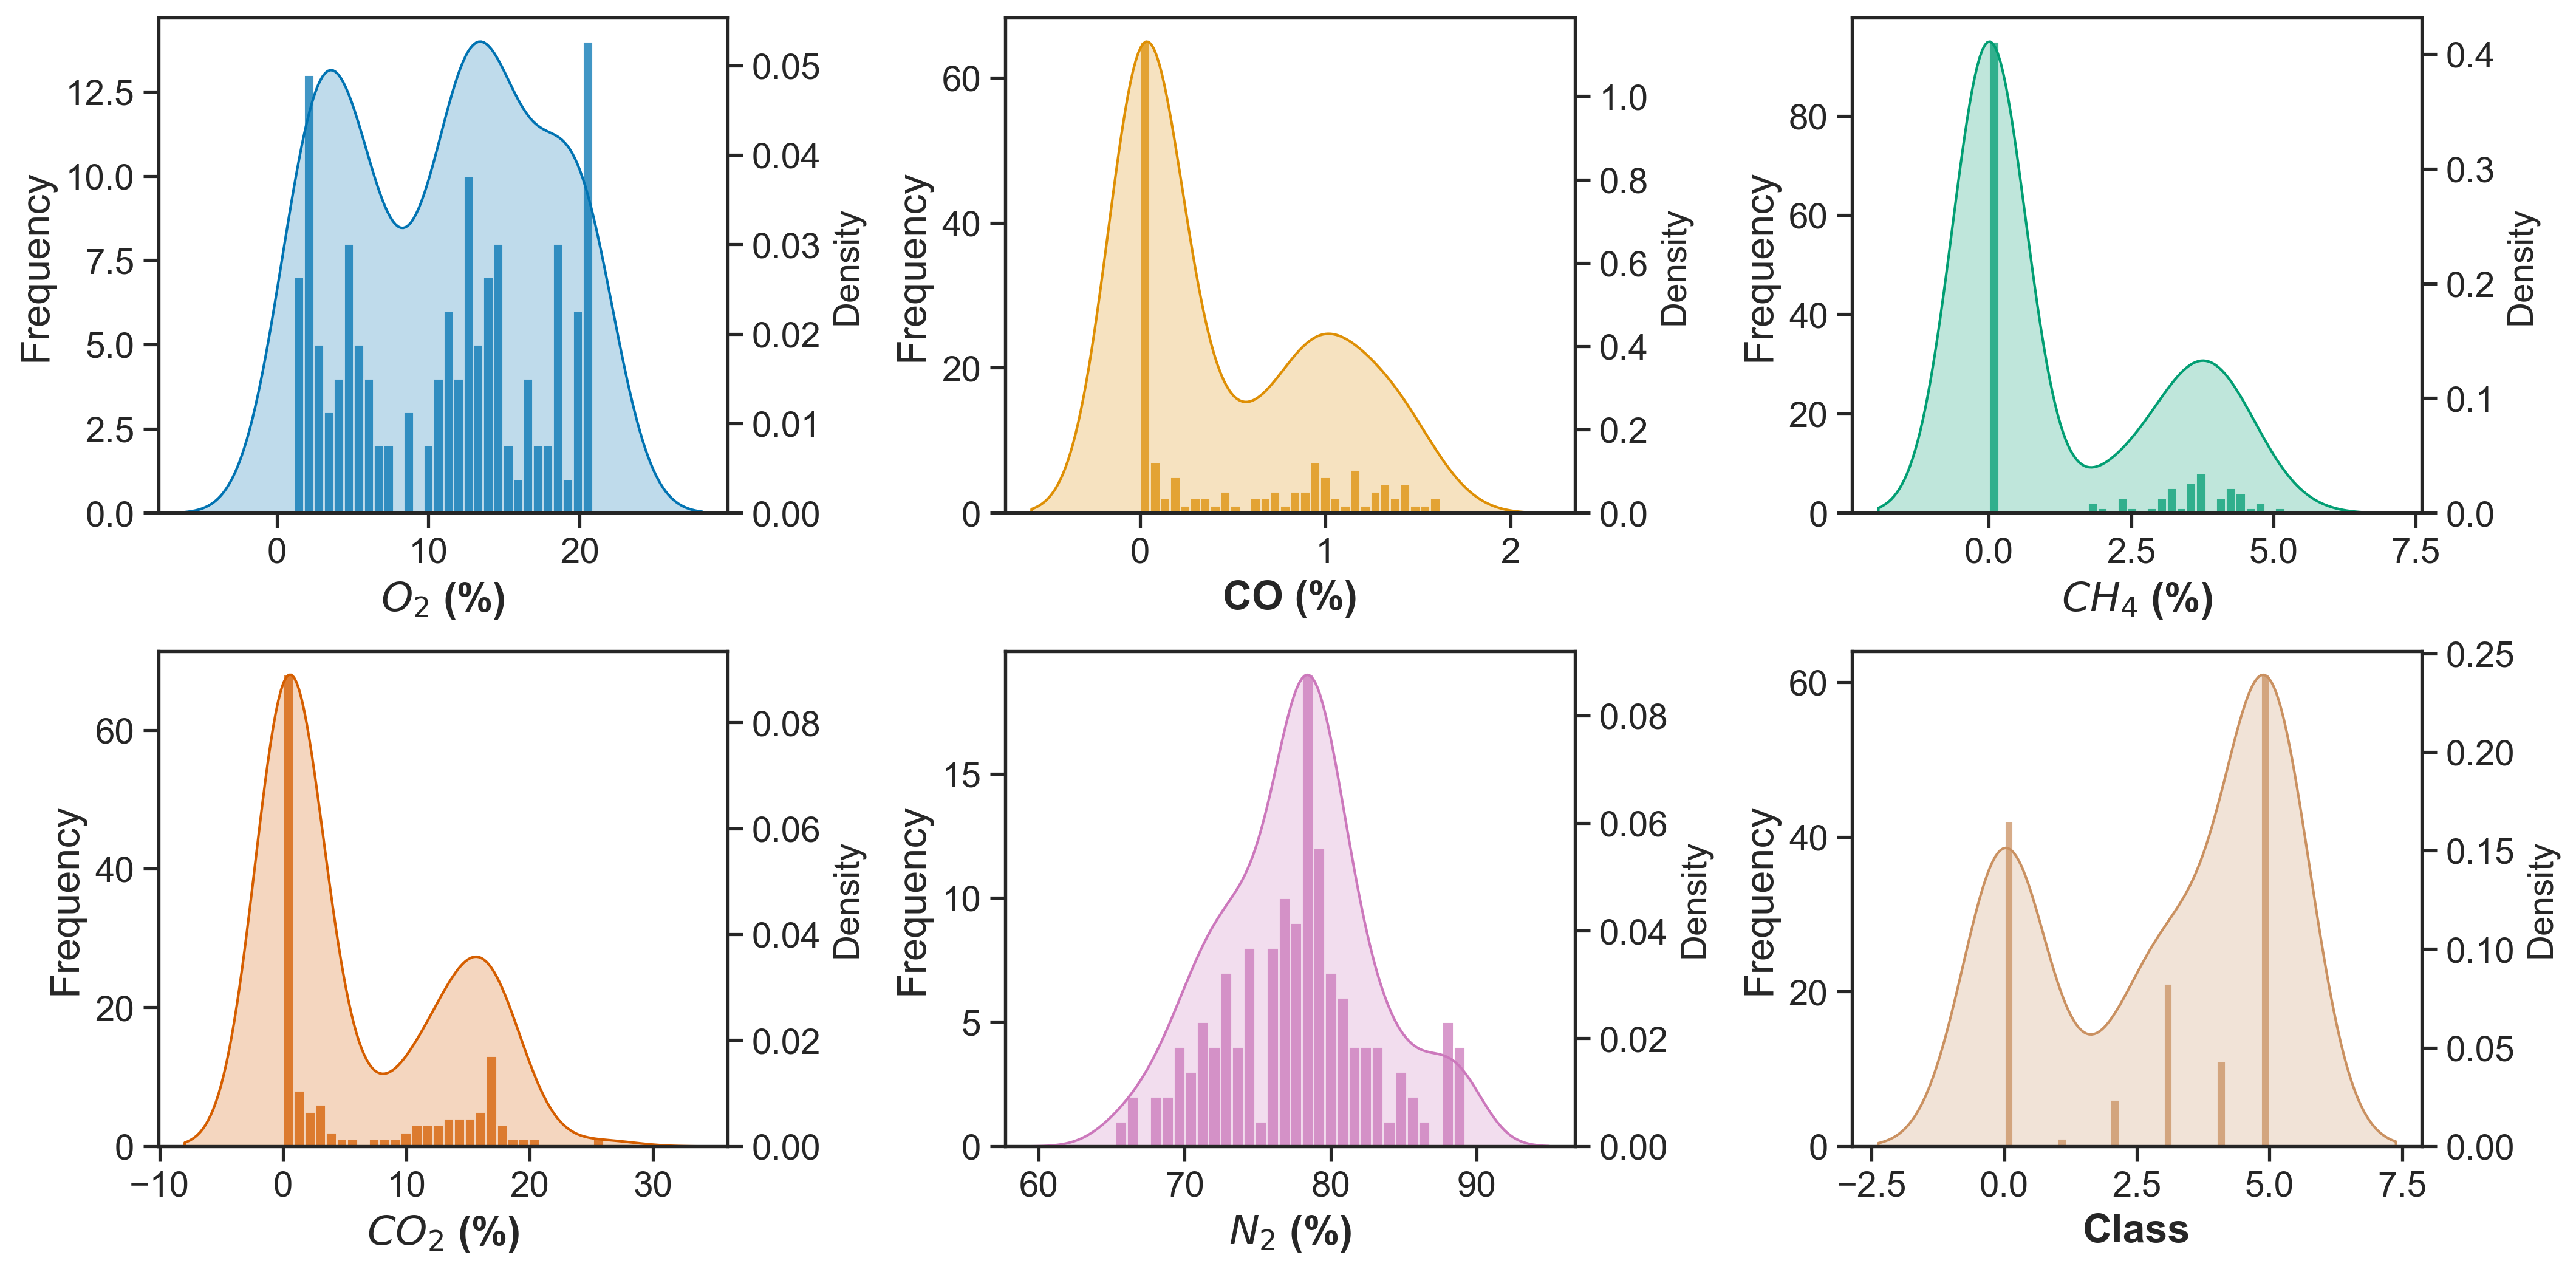

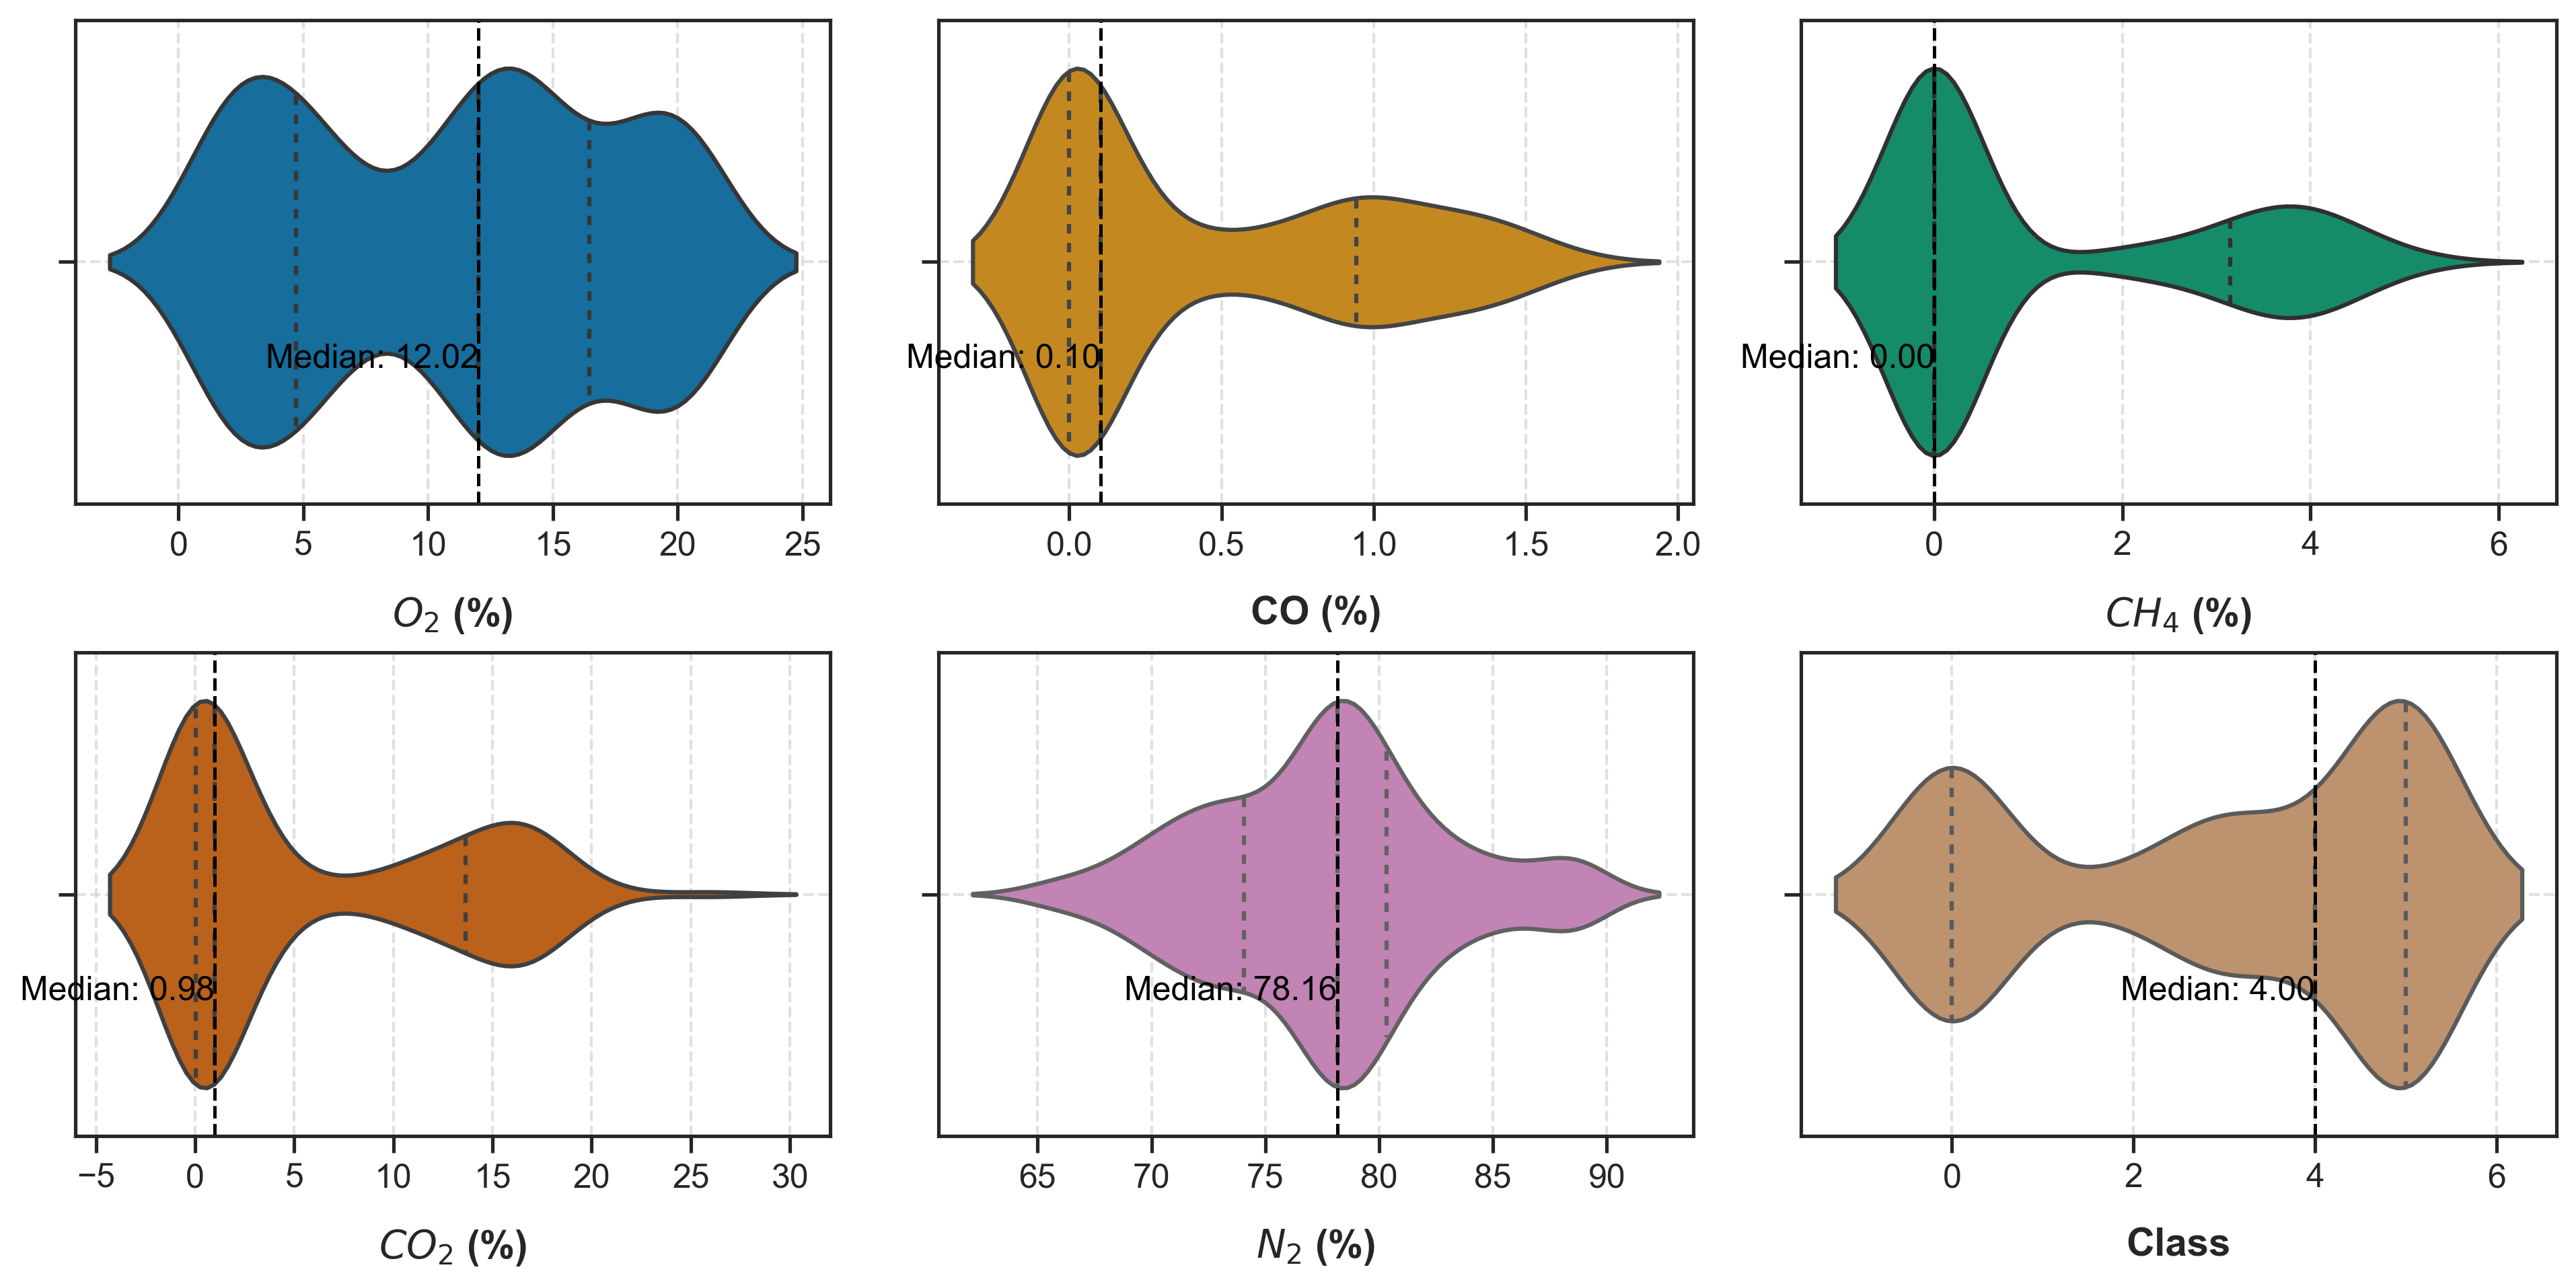

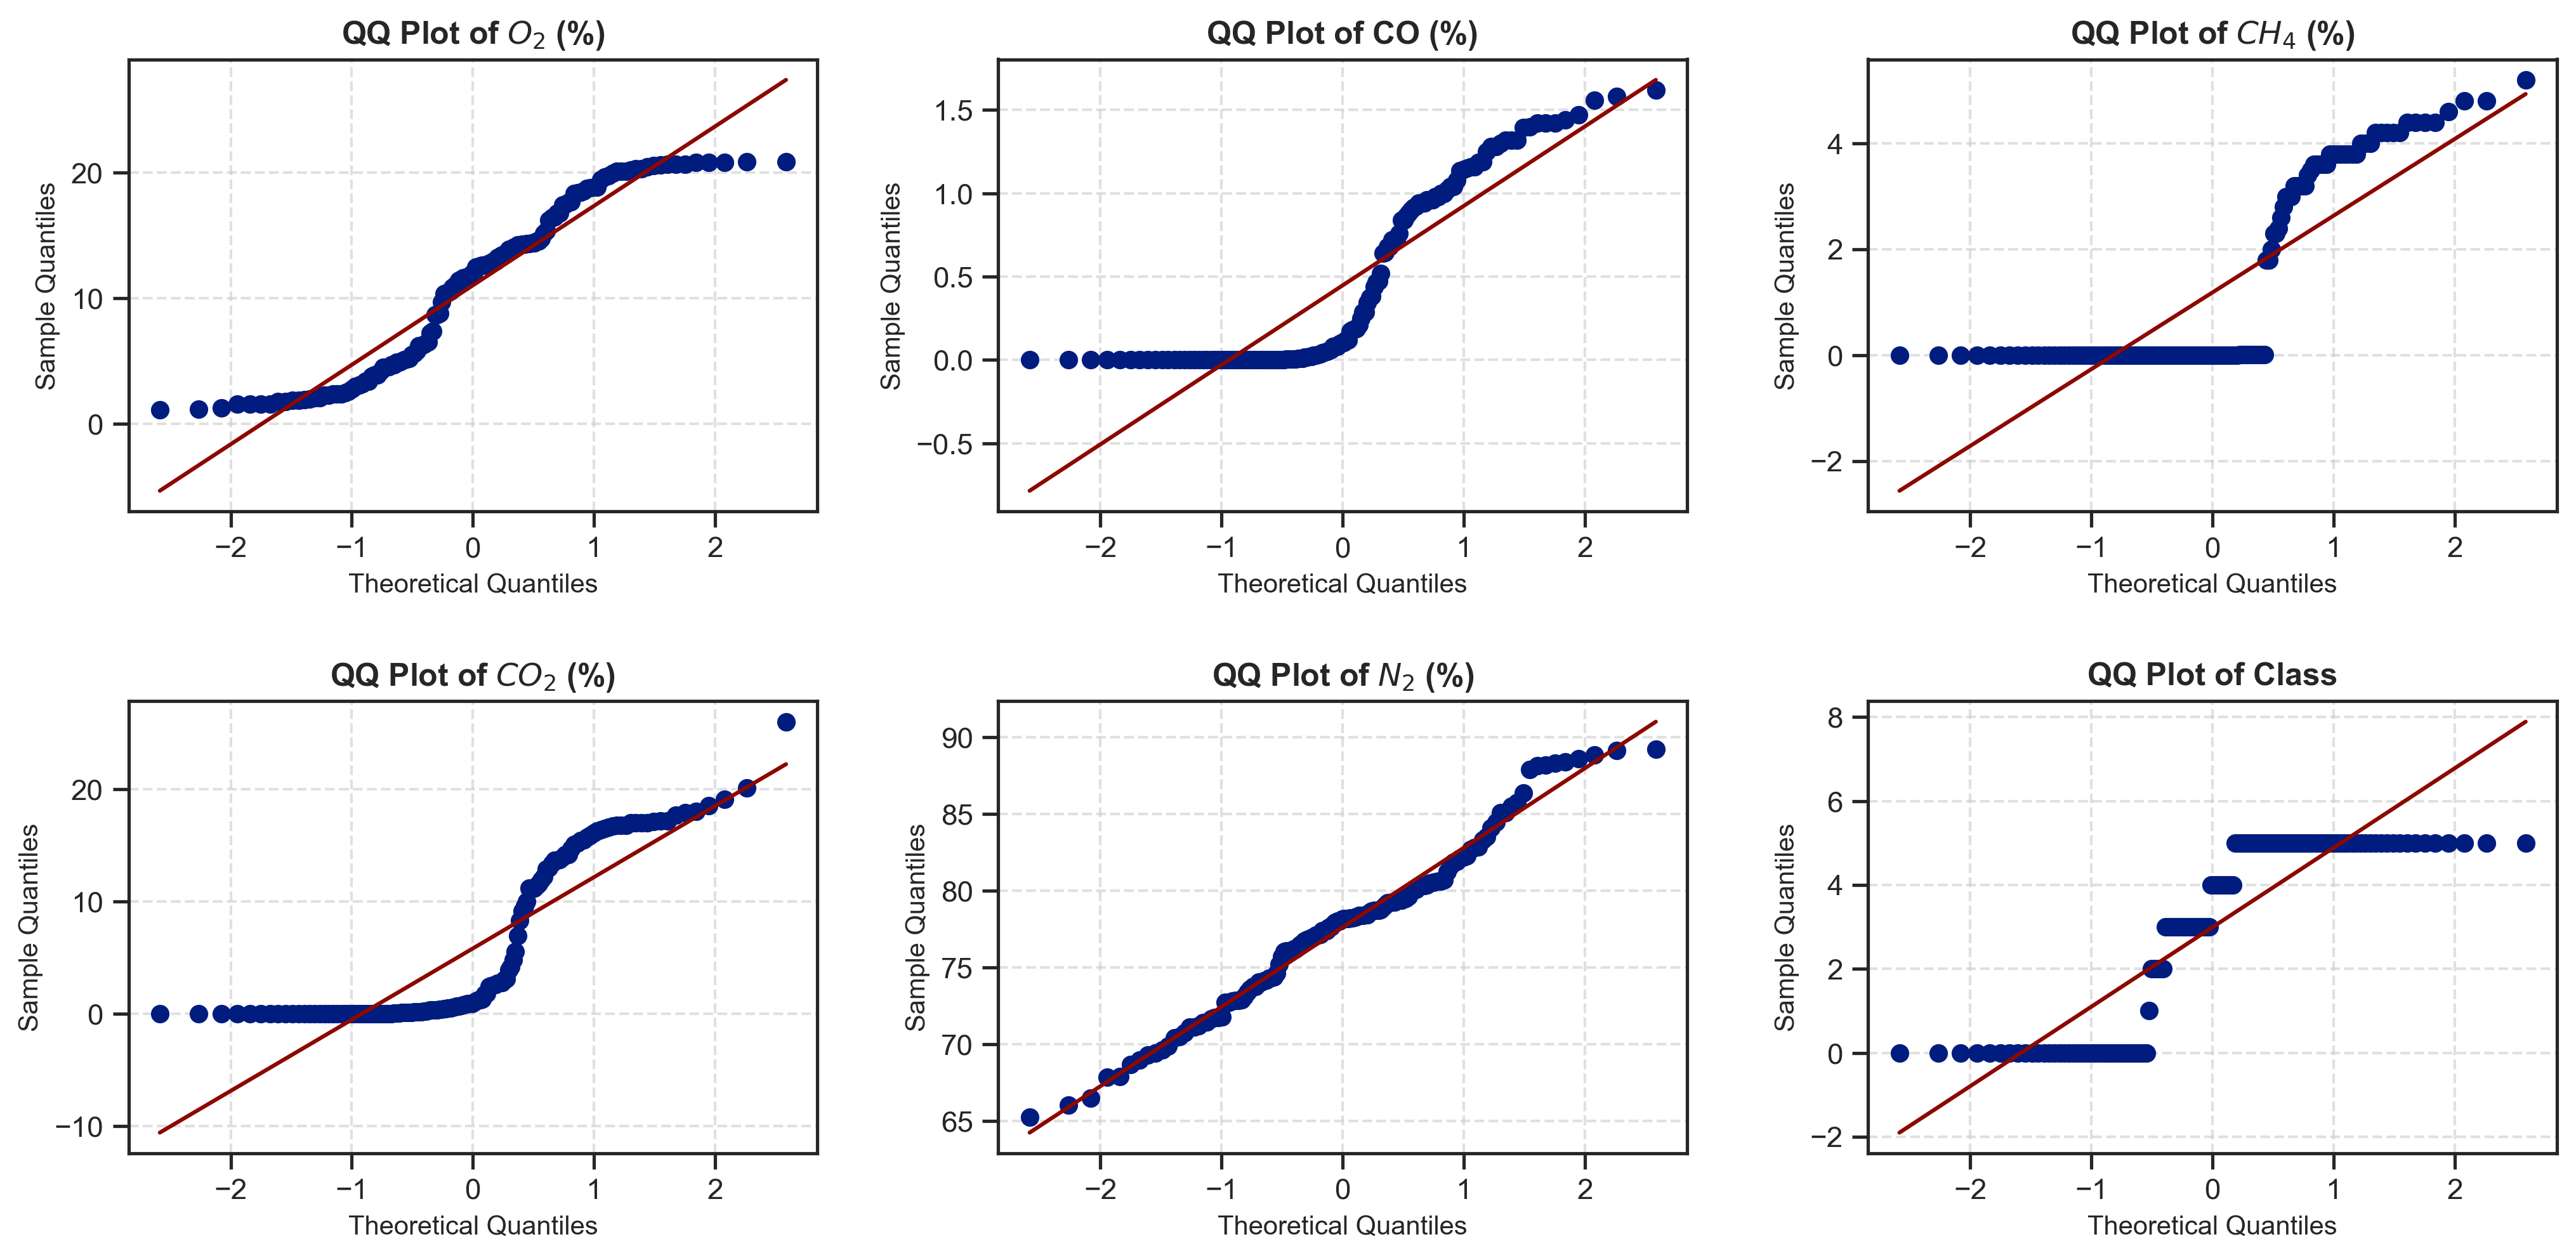

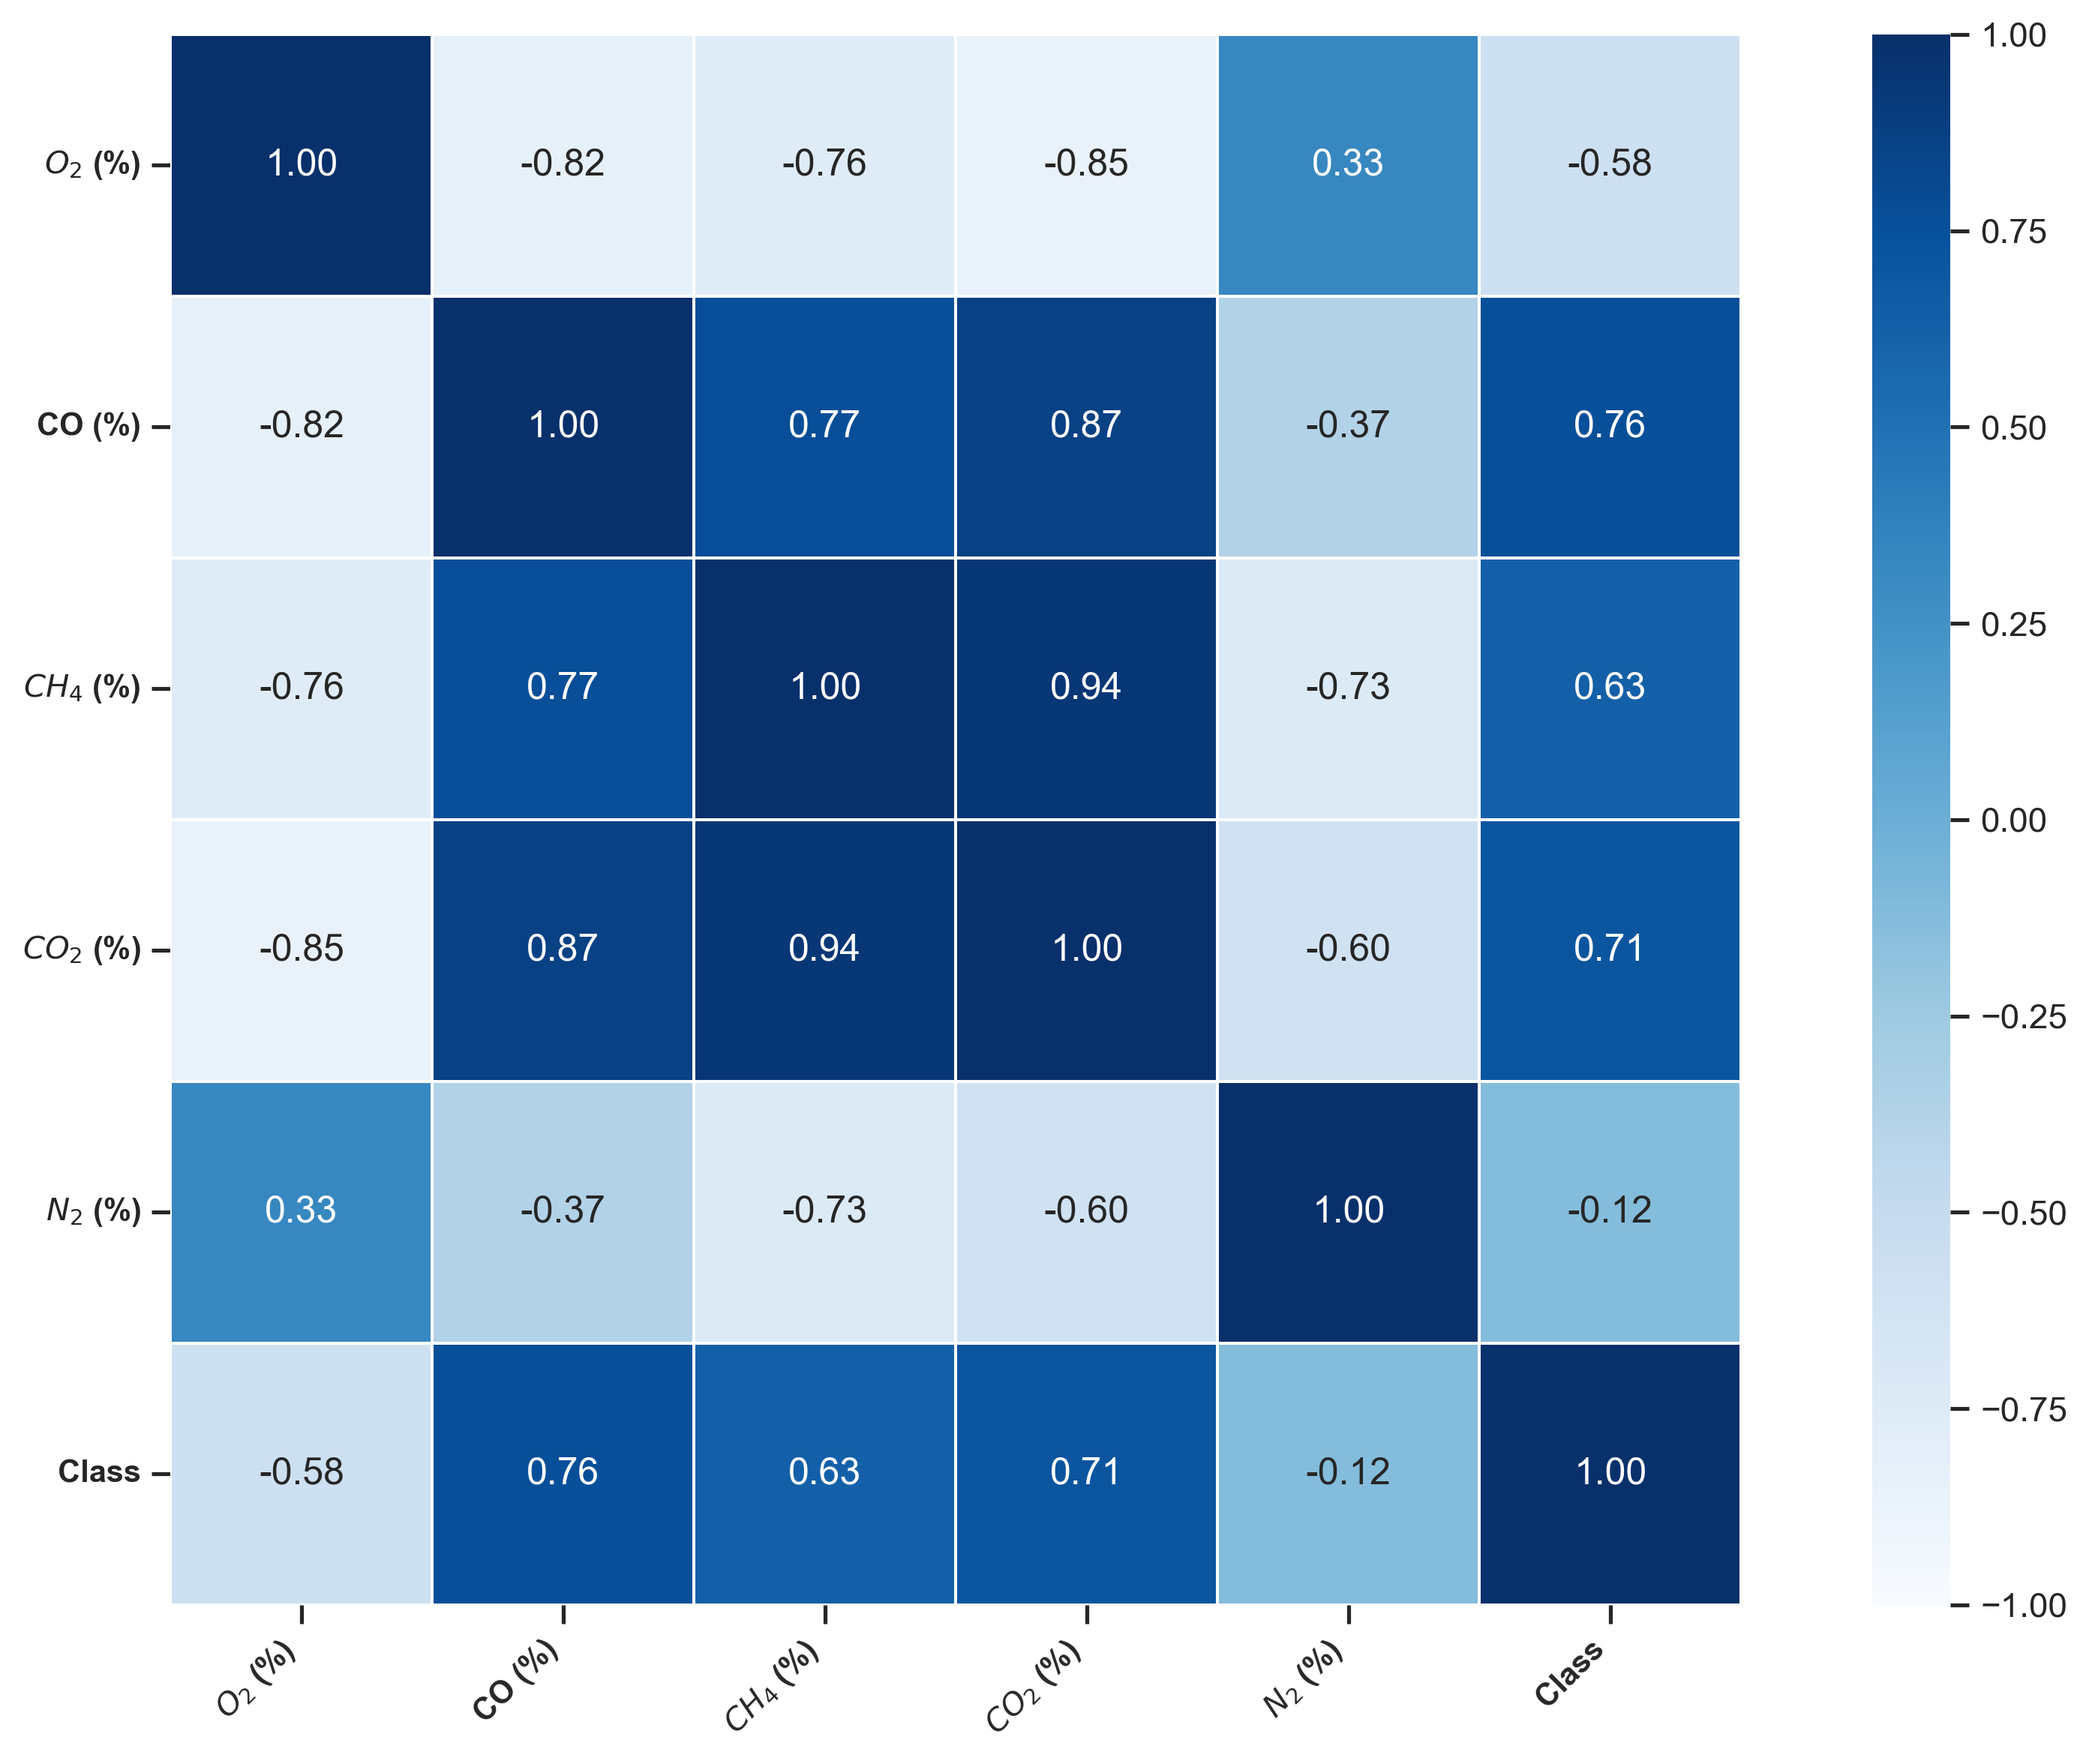

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram, linkage
from openpyxl import load_workbook

# Set a beautiful theme for all plots
sb.set_theme(style="ticks", palette="dark")  # Good for plots with axis ticks
#sb.set(style="whitegrid", palette="muted", color_codes=False)
plt.rcParams['figure.dpi'] = 300  # Set desired DPI for on-screen display (optional)

# Descriptive Statistics
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Additional statistical measures
descriptive_stats.loc['variance'] = df.var()
descriptive_stats.loc['skewness'] = df.skew()
descriptive_stats.loc['kurtosis'] = df.kurtosis()

# Perform t-tests between features
t_test_results = {}
for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        feature1 = df.columns[i]
        feature2 = df.columns[j]
        t_stat, p_value = stats.ttest_ind(df[feature1].dropna(), df[feature2].dropna())
        t_test_results[f'{feature1} vs {feature2}'] = {'t-statistic': t_stat, 'p-value': p_value}

t_test_df = pd.DataFrame.from_dict(t_test_results, orient='index')

# Save results to Excel
file_name = 'Descriptive_Statistics.xlsx'
with pd.ExcelWriter(file_name, engine='openpyxl', mode='w') as writer:
    descriptive_stats.to_excel(writer, sheet_name='Descriptive_Statistics')
    t_test_df.to_excel(writer, sheet_name='T_Test_Results')

# Custom color palette
custom_palette = sb.color_palette("colorblind", len(df.columns))

# Combined Histograms and Density Plots
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    
    ax1 = plt.gca()
    sb.histplot(df[column], bins=30, kde=False, color=custom_palette[i], ax=ax1)
    ax1.set_xlabel(feature_names[i], fontsize=16, fontweight='bold')
    ax1.set_ylabel('Frequency', fontsize=16)
    
    ax2 = ax1.twinx()
    sb.kdeplot(df[column], fill=True, color=custom_palette[i], ax=ax2)
    ax2.set_ylabel('Density', fontsize=14)

    # Set tick label sizes
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=14)
    
plt.tight_layout(pad=1.0)
#plt.show()

# Save the figure as a PDF with 300 DPI
#plt.savefig("Fig5.pdf", format="pdf", dpi=300)

# Violin Plots
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sb.violinplot(x=df[column], inner="quart", bw=0.3, color=custom_palette[i],
                  linewidth=1.5)
    plt.xlabel(feature_names[i], fontsize=14, fontweight='bold', labelpad=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, which='major', linestyle='--', alpha=0.6)
    ax = plt.gca()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    median = df[column].median()
    plt.axvline(median, color='black', linestyle='--', linewidth=1.2)
    plt.text(median, 0.2, f'Median: {median:.2f}', horizontalalignment='right',
             verticalalignment='center', fontsize=12, color='black')
plt.tight_layout(pad=4.0, w_pad=0.5, h_pad=0.5)
#plt.show()

# Save the figure as a PDF with 300 DPI
#plt.savefig("Fig6.pdf", format="pdf", dpi=300)

# QQ Plots
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {feature_names[i]}', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlabel('Theoretical Quantiles', fontsize=10)
    plt.ylabel('Sample Quantiles', fontsize=10)
plt.tight_layout(pad=2.0)
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()

sb.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', vmin=-1, vmax=1,
           linewidths=.5, square=True,
           xticklabels=feature_names, yticklabels=feature_names)

plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(rotation=0, fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

#plt.show()
# Save the figure as a PDF with 300 DPI
#plt.savefig("Fig7.pdf", format="pdf", dpi=300)


1. Random Forest

Performance Metrics (Training):
Accuracy: 0.9717
Confusion Matrix:
[[30  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0 13  1  0]
 [ 0  0  0  2  7  0]
 [ 0  0  0  0  0 48]]

Performance Metrics (Testing):
Accuracy: 0.8611
Confusion Matrix:
[[12  0  0  0  0]
 [ 0  0  2  0  0]
 [ 1  1  5  0  0]
 [ 0  0  1  1  0]
 [ 0  0  0  0 13]]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


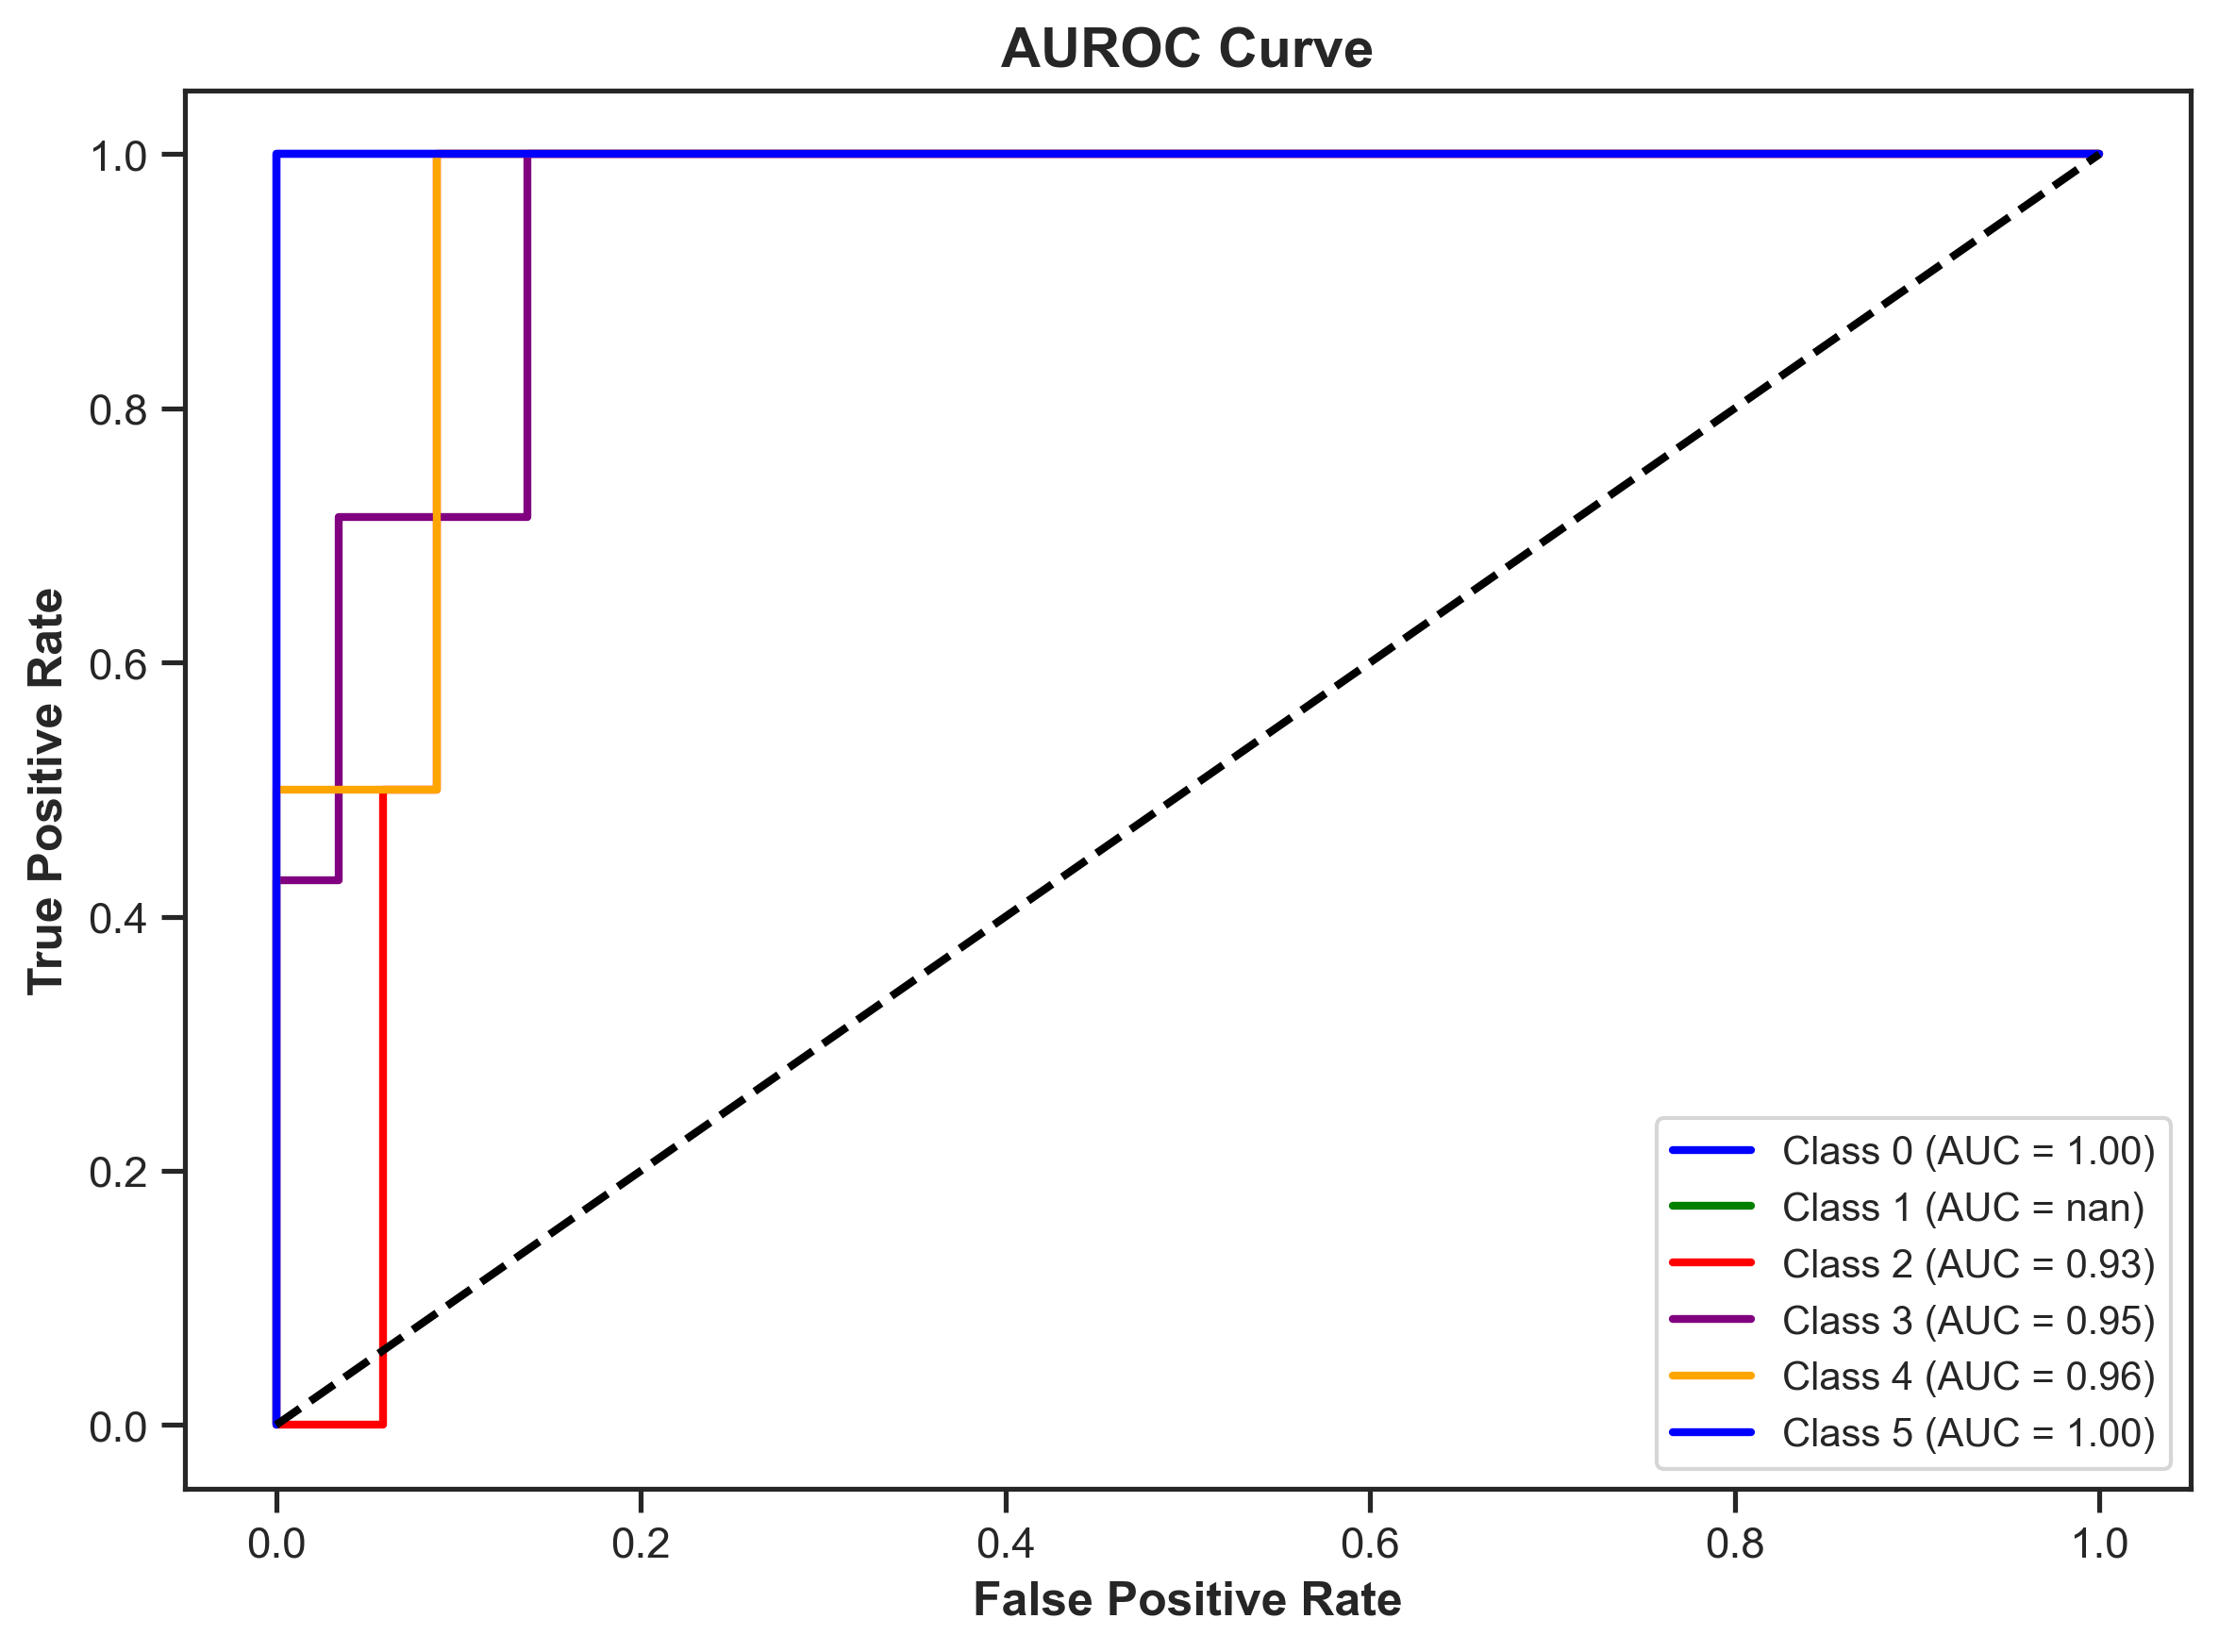

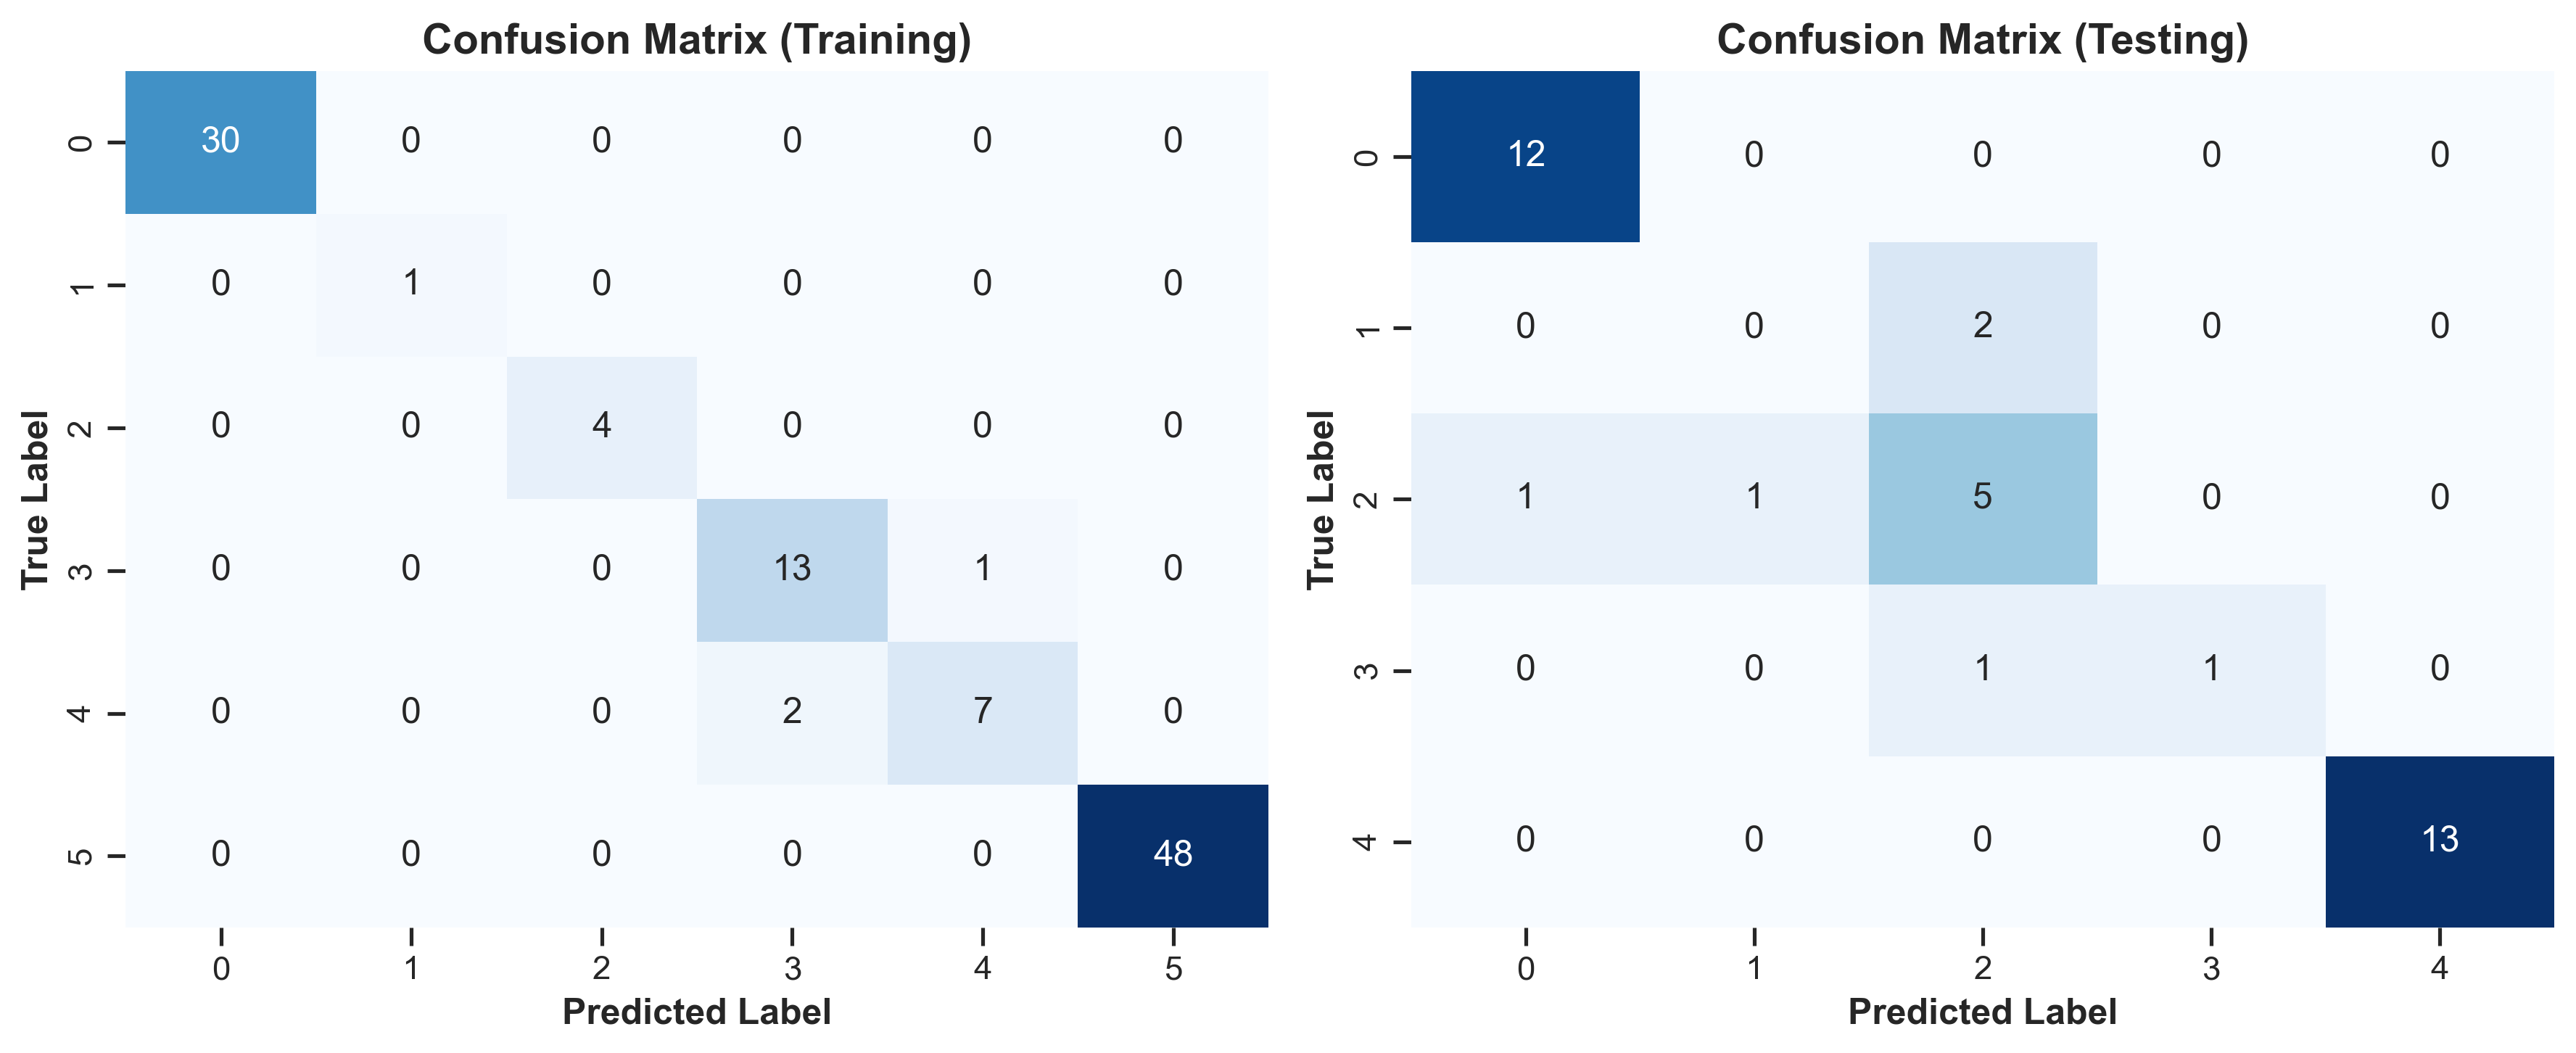

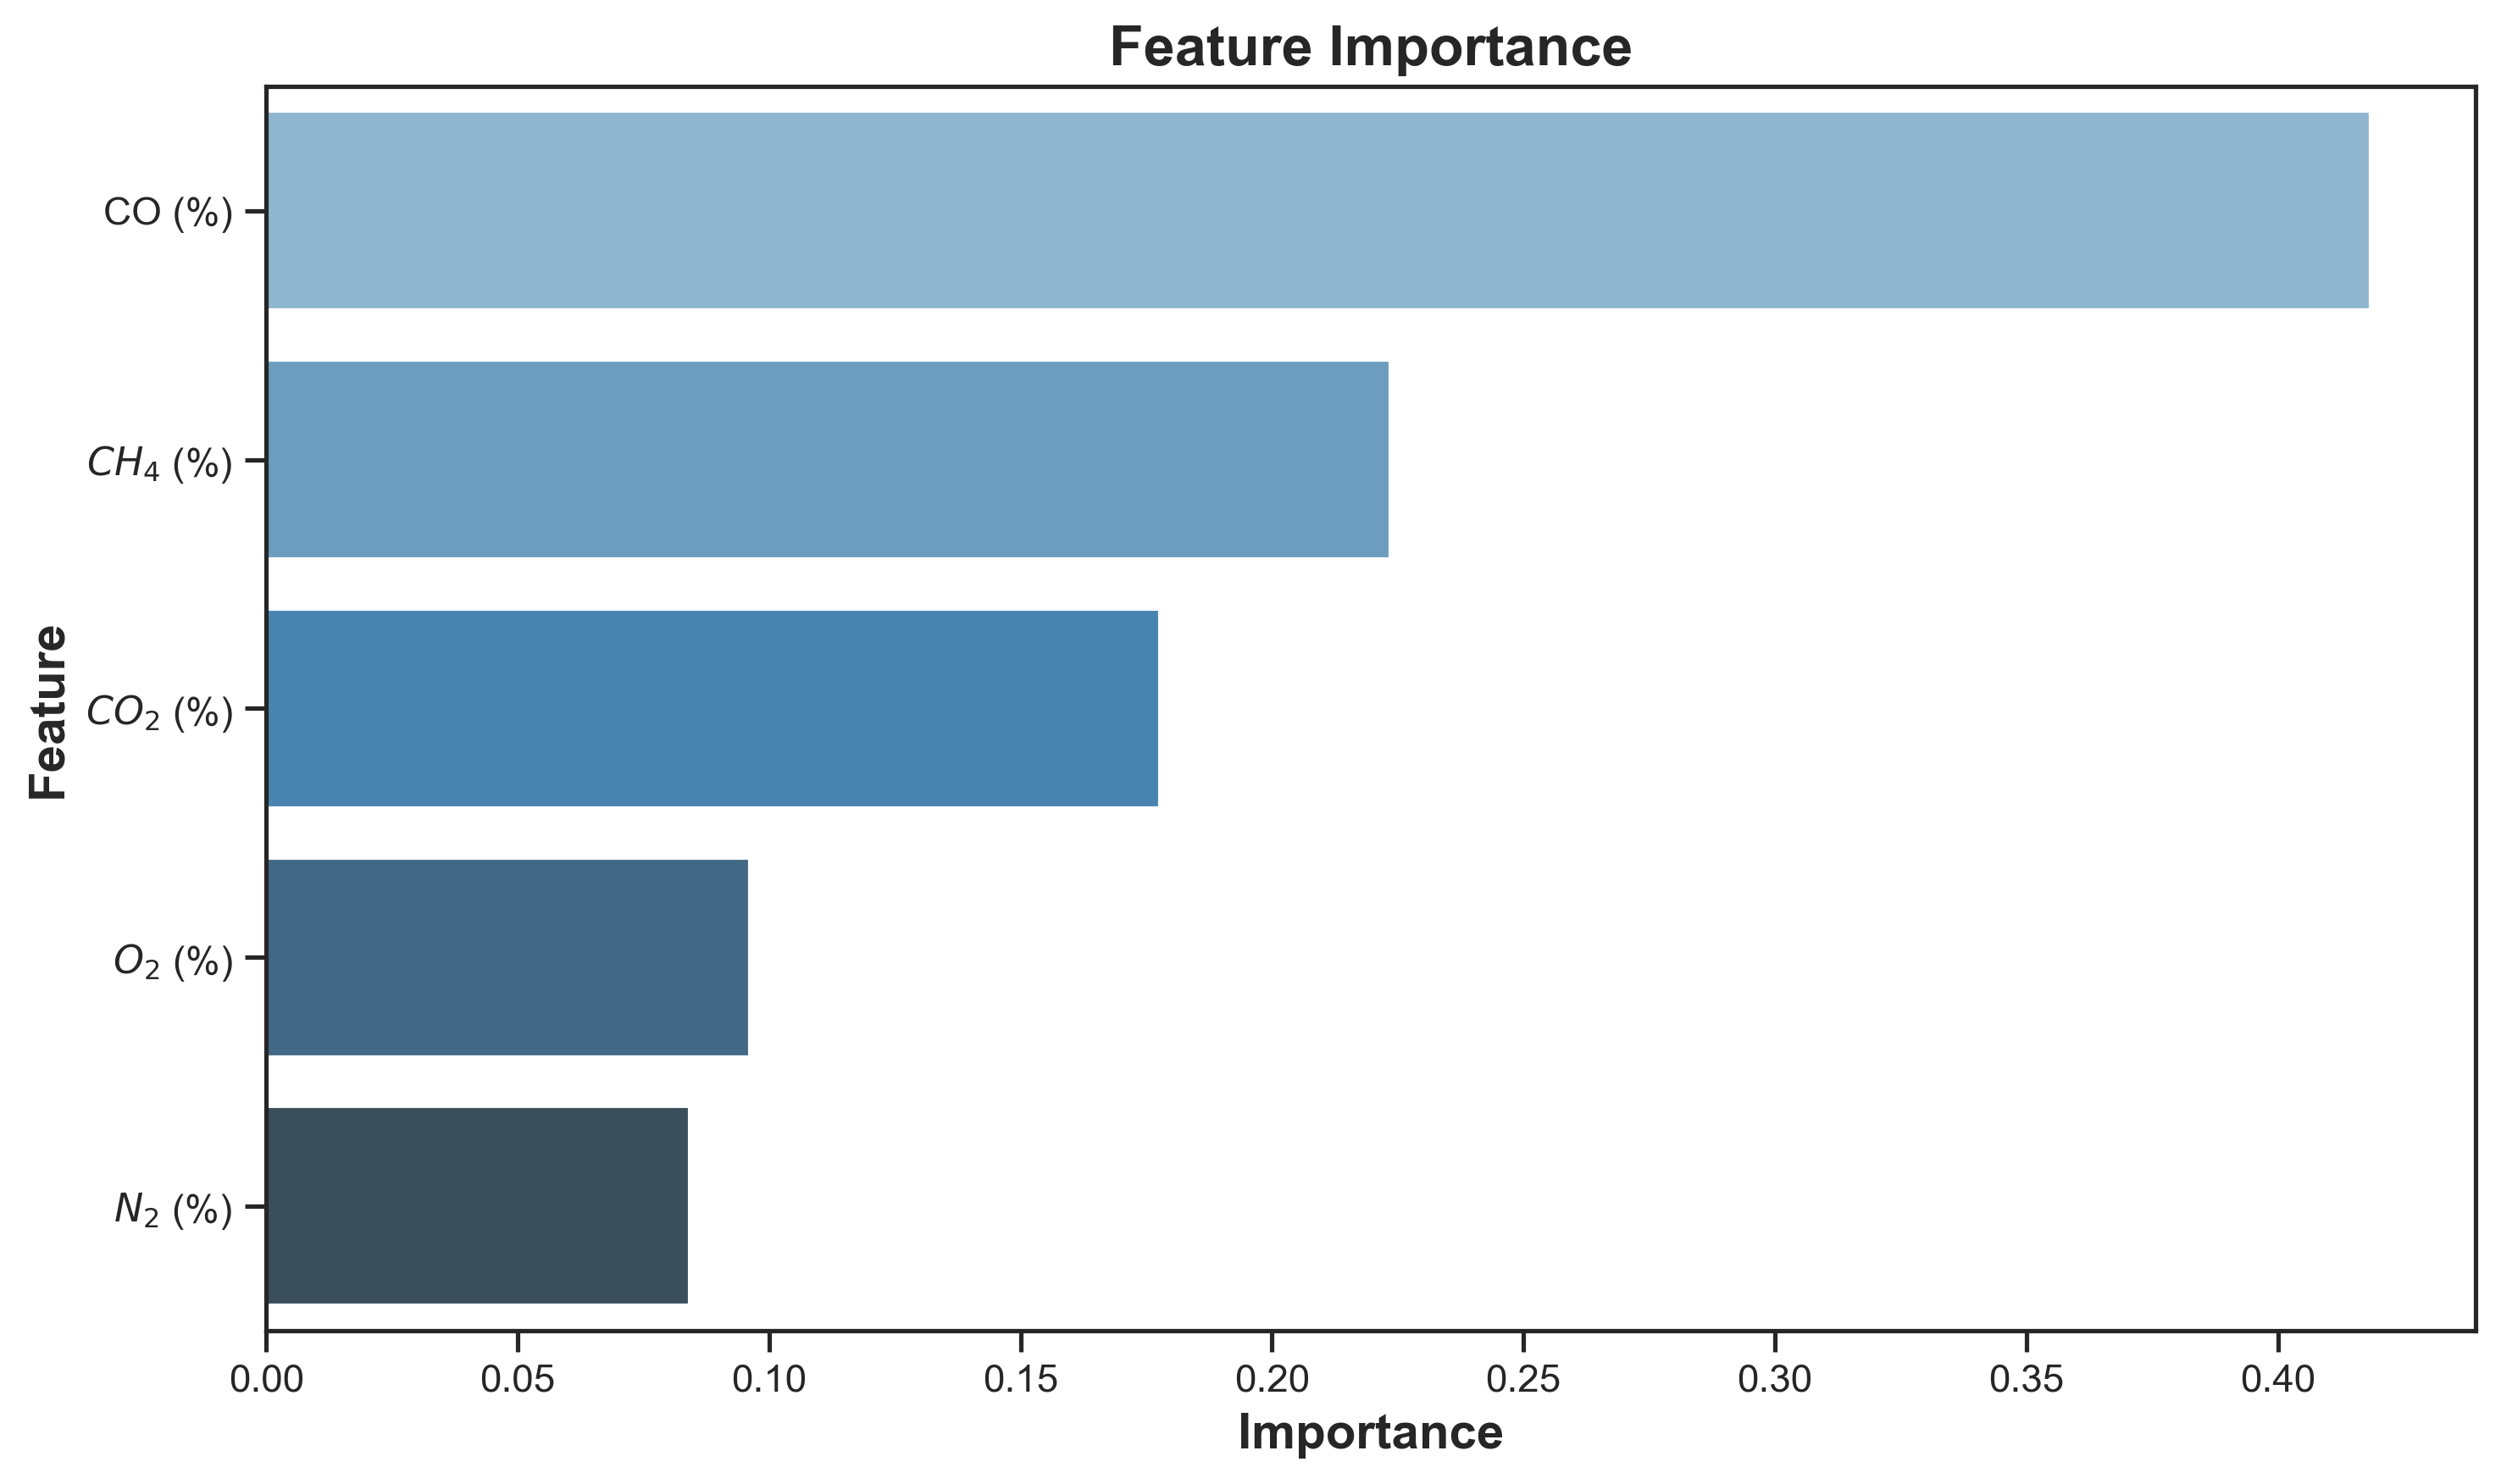

In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import joblib
# Access feature importance and plot it
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import time
from sklearn.preprocessing import label_binarize

# Define features and target
X = df.drop(columns=['Class'])  # Replace 'Class' with your actual column name if different
y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize Random Forest classifier
model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)

# Measure training time
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Fit model on full training data and evaluate on test data
model.fit(X_train, y_train)

# Make predictions for training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate performance metrics for training
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='weighted')
train_recall = recall_score(y_train, train_predictions, average='weighted')
train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Calculate performance metrics for testing
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Prepare the performance metrics data
performance_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time (s)'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1, training_time],
    'Test': [test_accuracy, test_precision, test_recall, test_f1, None]
}

# Create DataFrame for performance metrics
performance_df = pd.DataFrame(performance_data)

# Prepare observed vs predicted classes along with input features for training and testing
train_data = X_train.copy()
train_data['Observed'] = y_train
train_data['Predicted'] = train_predictions

test_data = X_test.copy()
test_data['Observed'] = y_test
test_data['Predicted'] = test_predictions

# Model name for sheet-specific naming
model_name = 'RandomForest_model'

# Save results to Excel
with pd.ExcelWriter(f'{model_name}_Classification_results.xlsx') as writer:
    performance_df.to_excel(writer, sheet_name='RandomForest', index=False)
    train_data.to_excel(writer, sheet_name='Train_Observed_vs_Predicted', index=False)
    test_data.to_excel(writer, sheet_name='Test_Observed_vs_Predicted', index=False)

# Save the trained model as a joblib file
joblib.dump(model, f'{model_name}.joblib')

# Calculate performance metrics for training
train_conf_matrix = confusion_matrix(y_train, train_predictions)

print("Performance Metrics (Training):")
print(f"Accuracy: {train_accuracy:.4f}")
print("Confusion Matrix:")
print(train_conf_matrix)

# Calculate performance metrics for testing
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print("\nPerformance Metrics (Testing):")
print(f"Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)

# ------------------------------- AUROC Curve Plot -------------------------------
# Compute probabilities for AUROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_score = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6), dpi=300)
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i in range(6):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)

# Beautify AUROC plot
plt.xlabel("False Positive Rate", fontsize=12, fontweight='bold')
plt.ylabel("True Positive Rate", fontsize=12, fontweight='bold')
plt.title("AUROC Curve", fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()

# ------------------------------- Side-by-Side Confusion Matrix (High DPI) -------------------------------
train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

# Training Confusion Matrix
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title("Confusion Matrix (Training)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Predicted Label", fontsize=12, fontweight='bold')
axes[0].set_ylabel("True Label", fontsize=12, fontweight='bold')

# Testing Confusion Matrix
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title("Confusion Matrix (Testing)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Predicted Label", fontsize=12, fontweight='bold')
axes[1].set_ylabel("True Label", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ------------------------------- AUROC Curve -------------------------------
if len(set(y)) == 2:  # Only for binary classification
    train_probs = model.predict_proba(X_train)[:, 1]
    test_probs = model.predict_proba(X_test)[:, 1]

    train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
    test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)

    plt.figure(figsize=(7, 6), dpi=300)
    plt.plot(train_fpr, train_tpr, linestyle='--', color='blue', label=f'Training (AUC = {train_auc:.3f})')
    plt.plot(test_fpr, test_tpr, linestyle='-', color='red', label=f'Testing (AUC = {test_auc:.3f})')
    plt.plot([0, 1], [0, 1], linestyle='dashed', color='gray')

    plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    plt.title('AUROC Curve', fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(False)
    plt.show()


    # Define symbolic feature names
#feature_names = ['$O_2$ (%)', 'CO (%)', '$CH_4$ (%)', '$CO_2$ (%)', '$H_2$ (%)', '$N_2$ (%)', 'Class']
feature_names = ['$O_2$ (%)', 'CO (%)', '$CH_4$ (%)', '$CO_2$ (%)', '$N_2$ (%)', 'Class']

# Get the feature importance from the trained model
importances = model.feature_importances_

# Create a DataFrame to display feature names and their corresponding importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names[:-1],  # Exclude 'Class' as it's not used for feature importance
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance as a bar chart
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_d')

# Beautify the plot for publication quality
plt.title("Feature Importance", fontsize=16, fontweight='bold')
plt.xlabel("Importance", fontsize=14, fontweight='bold')
plt.ylabel("Feature", fontsize=14, fontweight='bold')

# Customize the y-axis to display features with symbolic names (already in LaTeX format)
plt.tight_layout()
plt.show()

2. XGBoost

Performance Metrics (Training):
Accuracy: 1.0000
Confusion Matrix:
[[30  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 48]]

Performance Metrics (Testing):
Accuracy: 0.8333
Confusion Matrix:
[[12  0  0  0  0]
 [ 0  1  1  0  0]
 [ 0  2  3  1  1]
 [ 0  1  0  1  0]
 [ 0  0  0  0 13]]


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


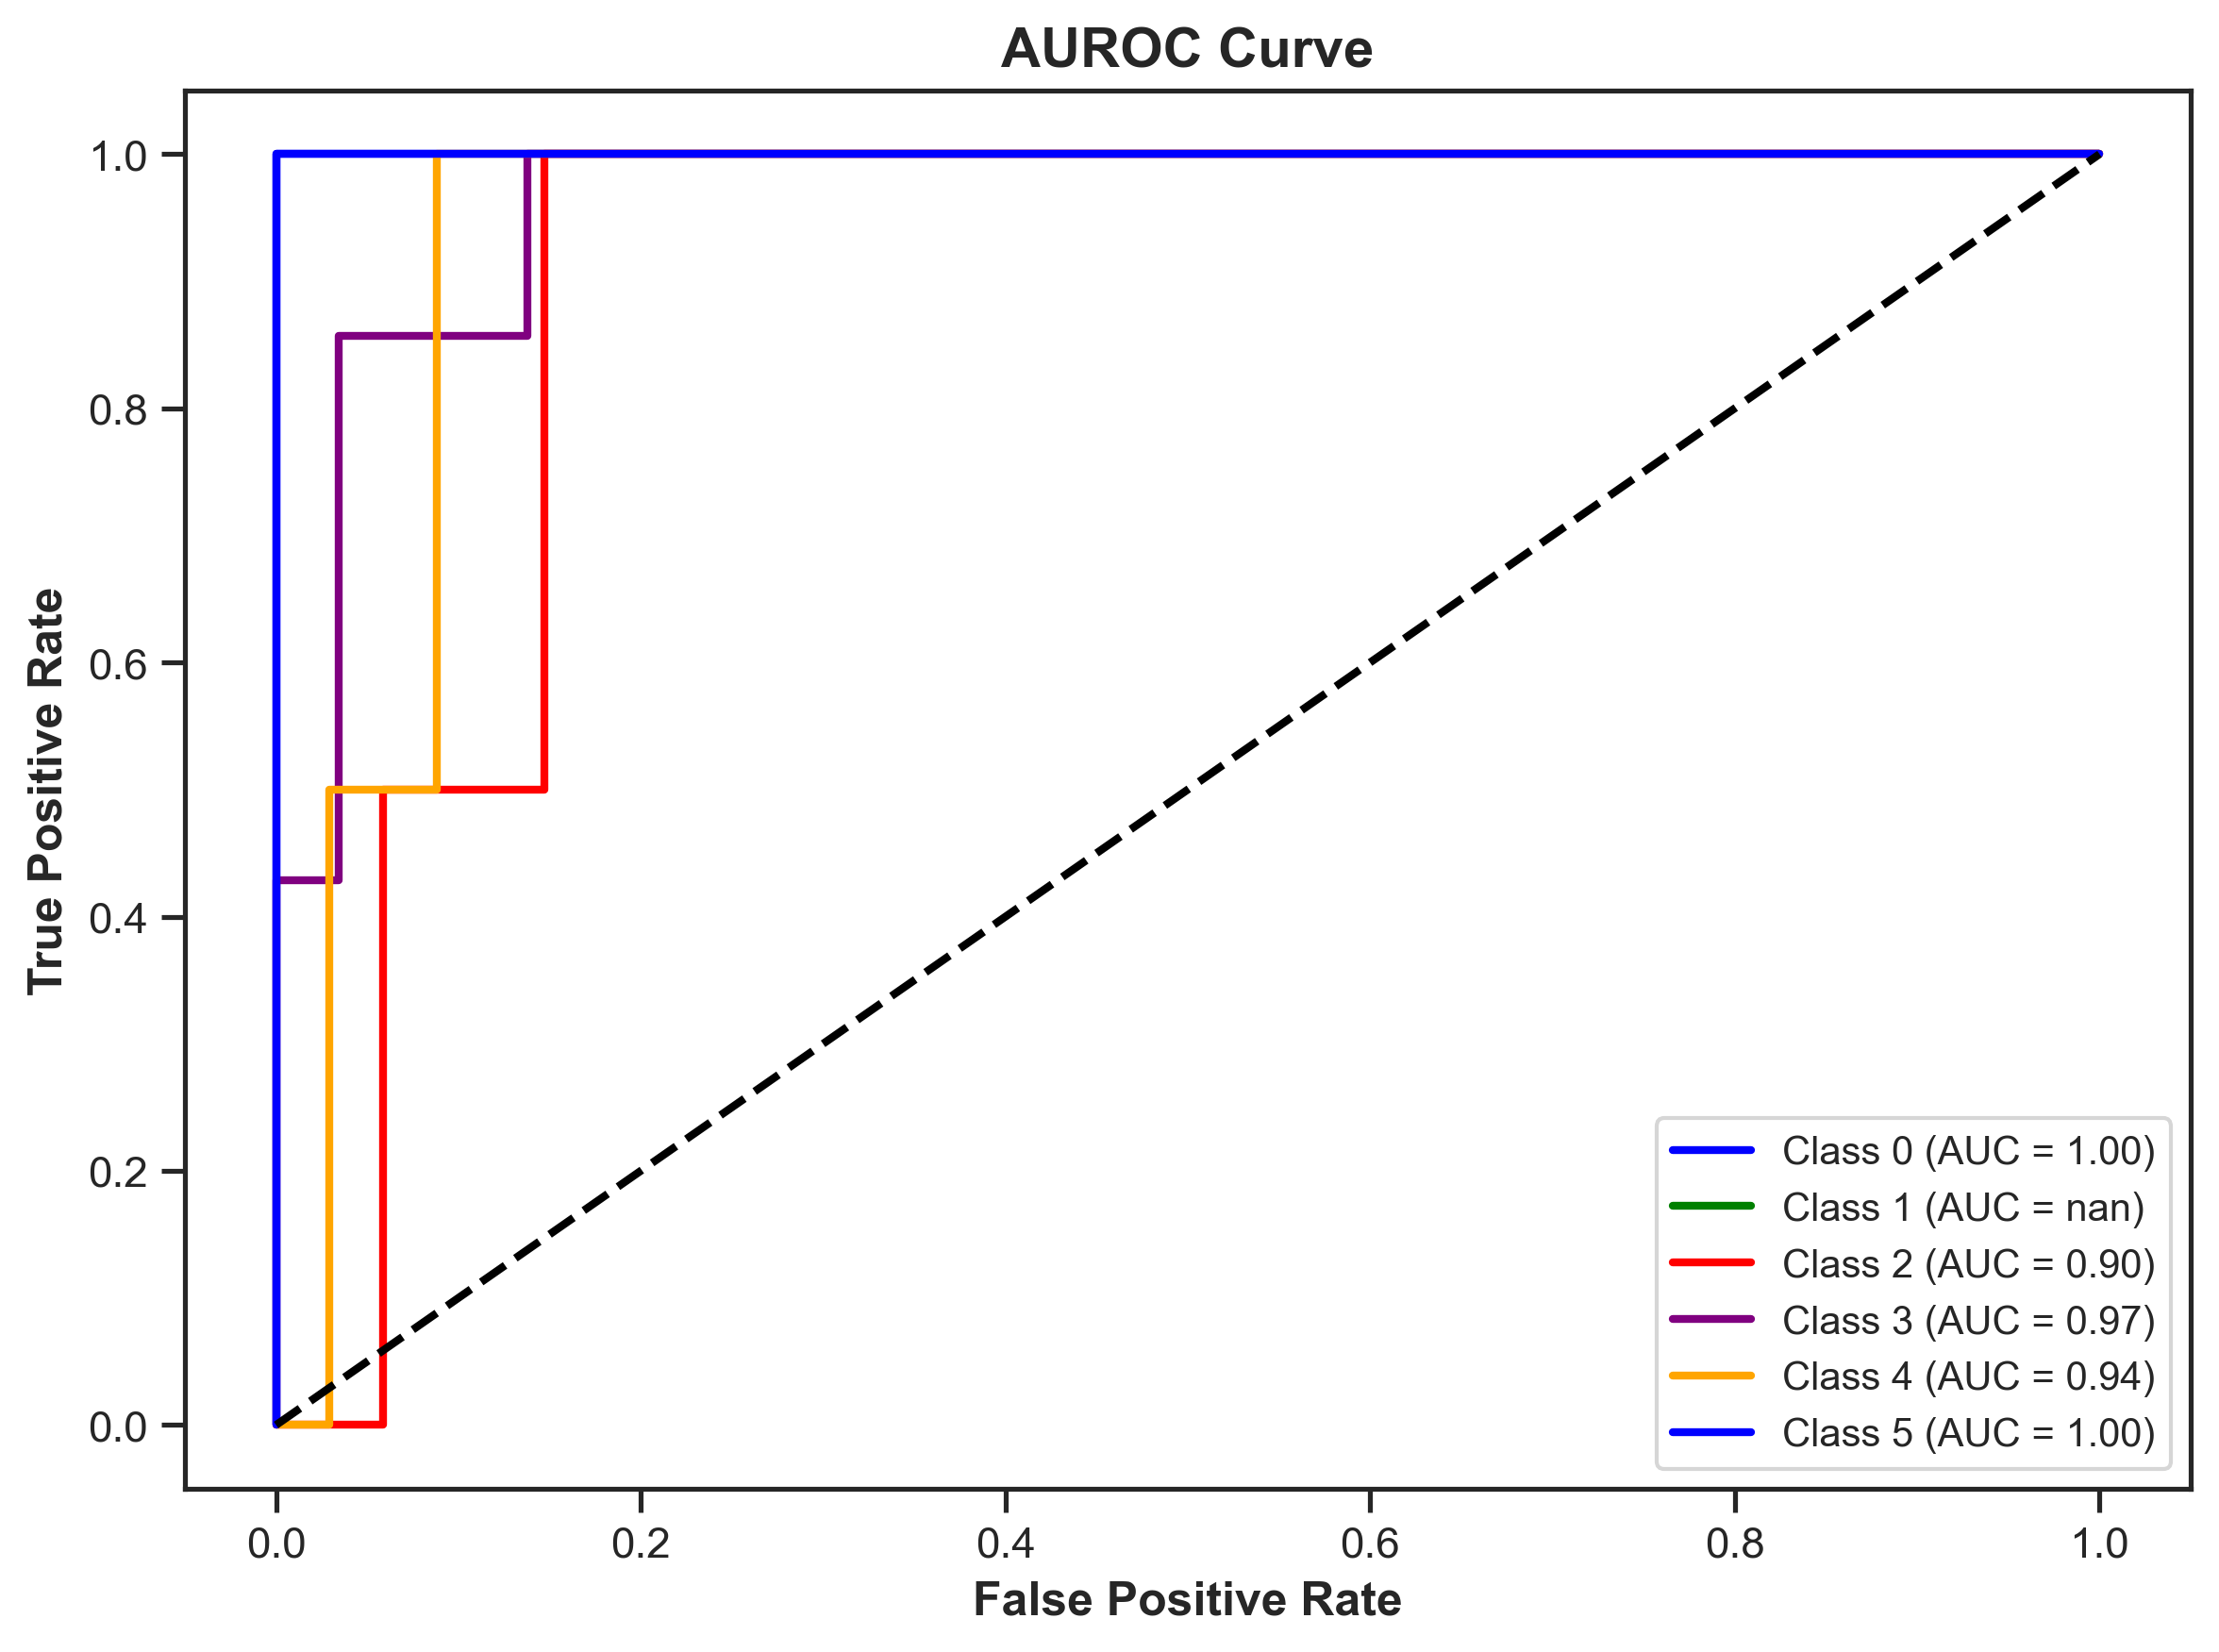

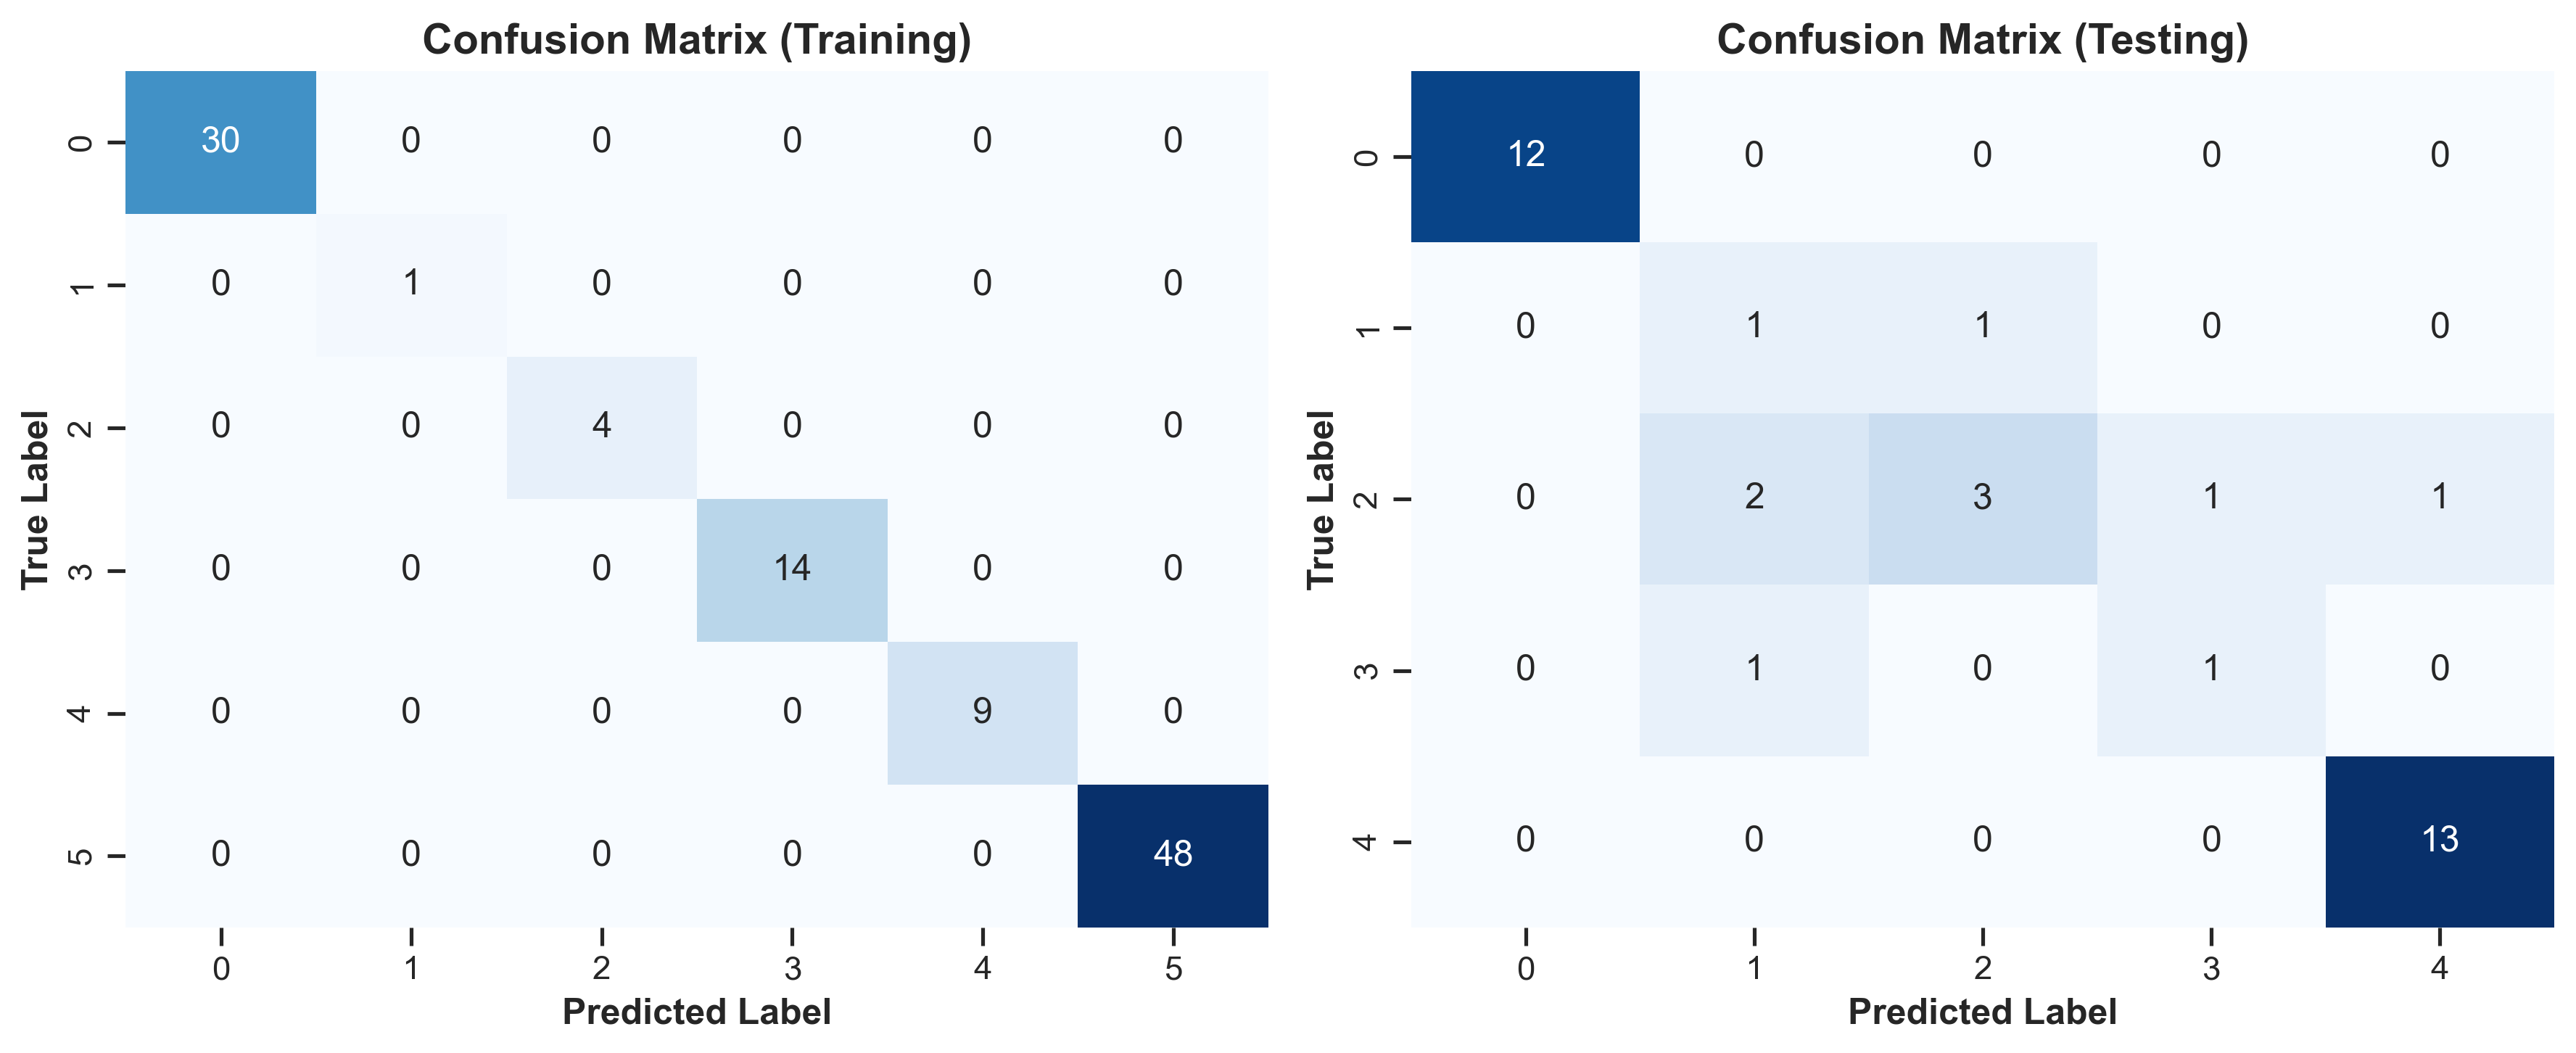

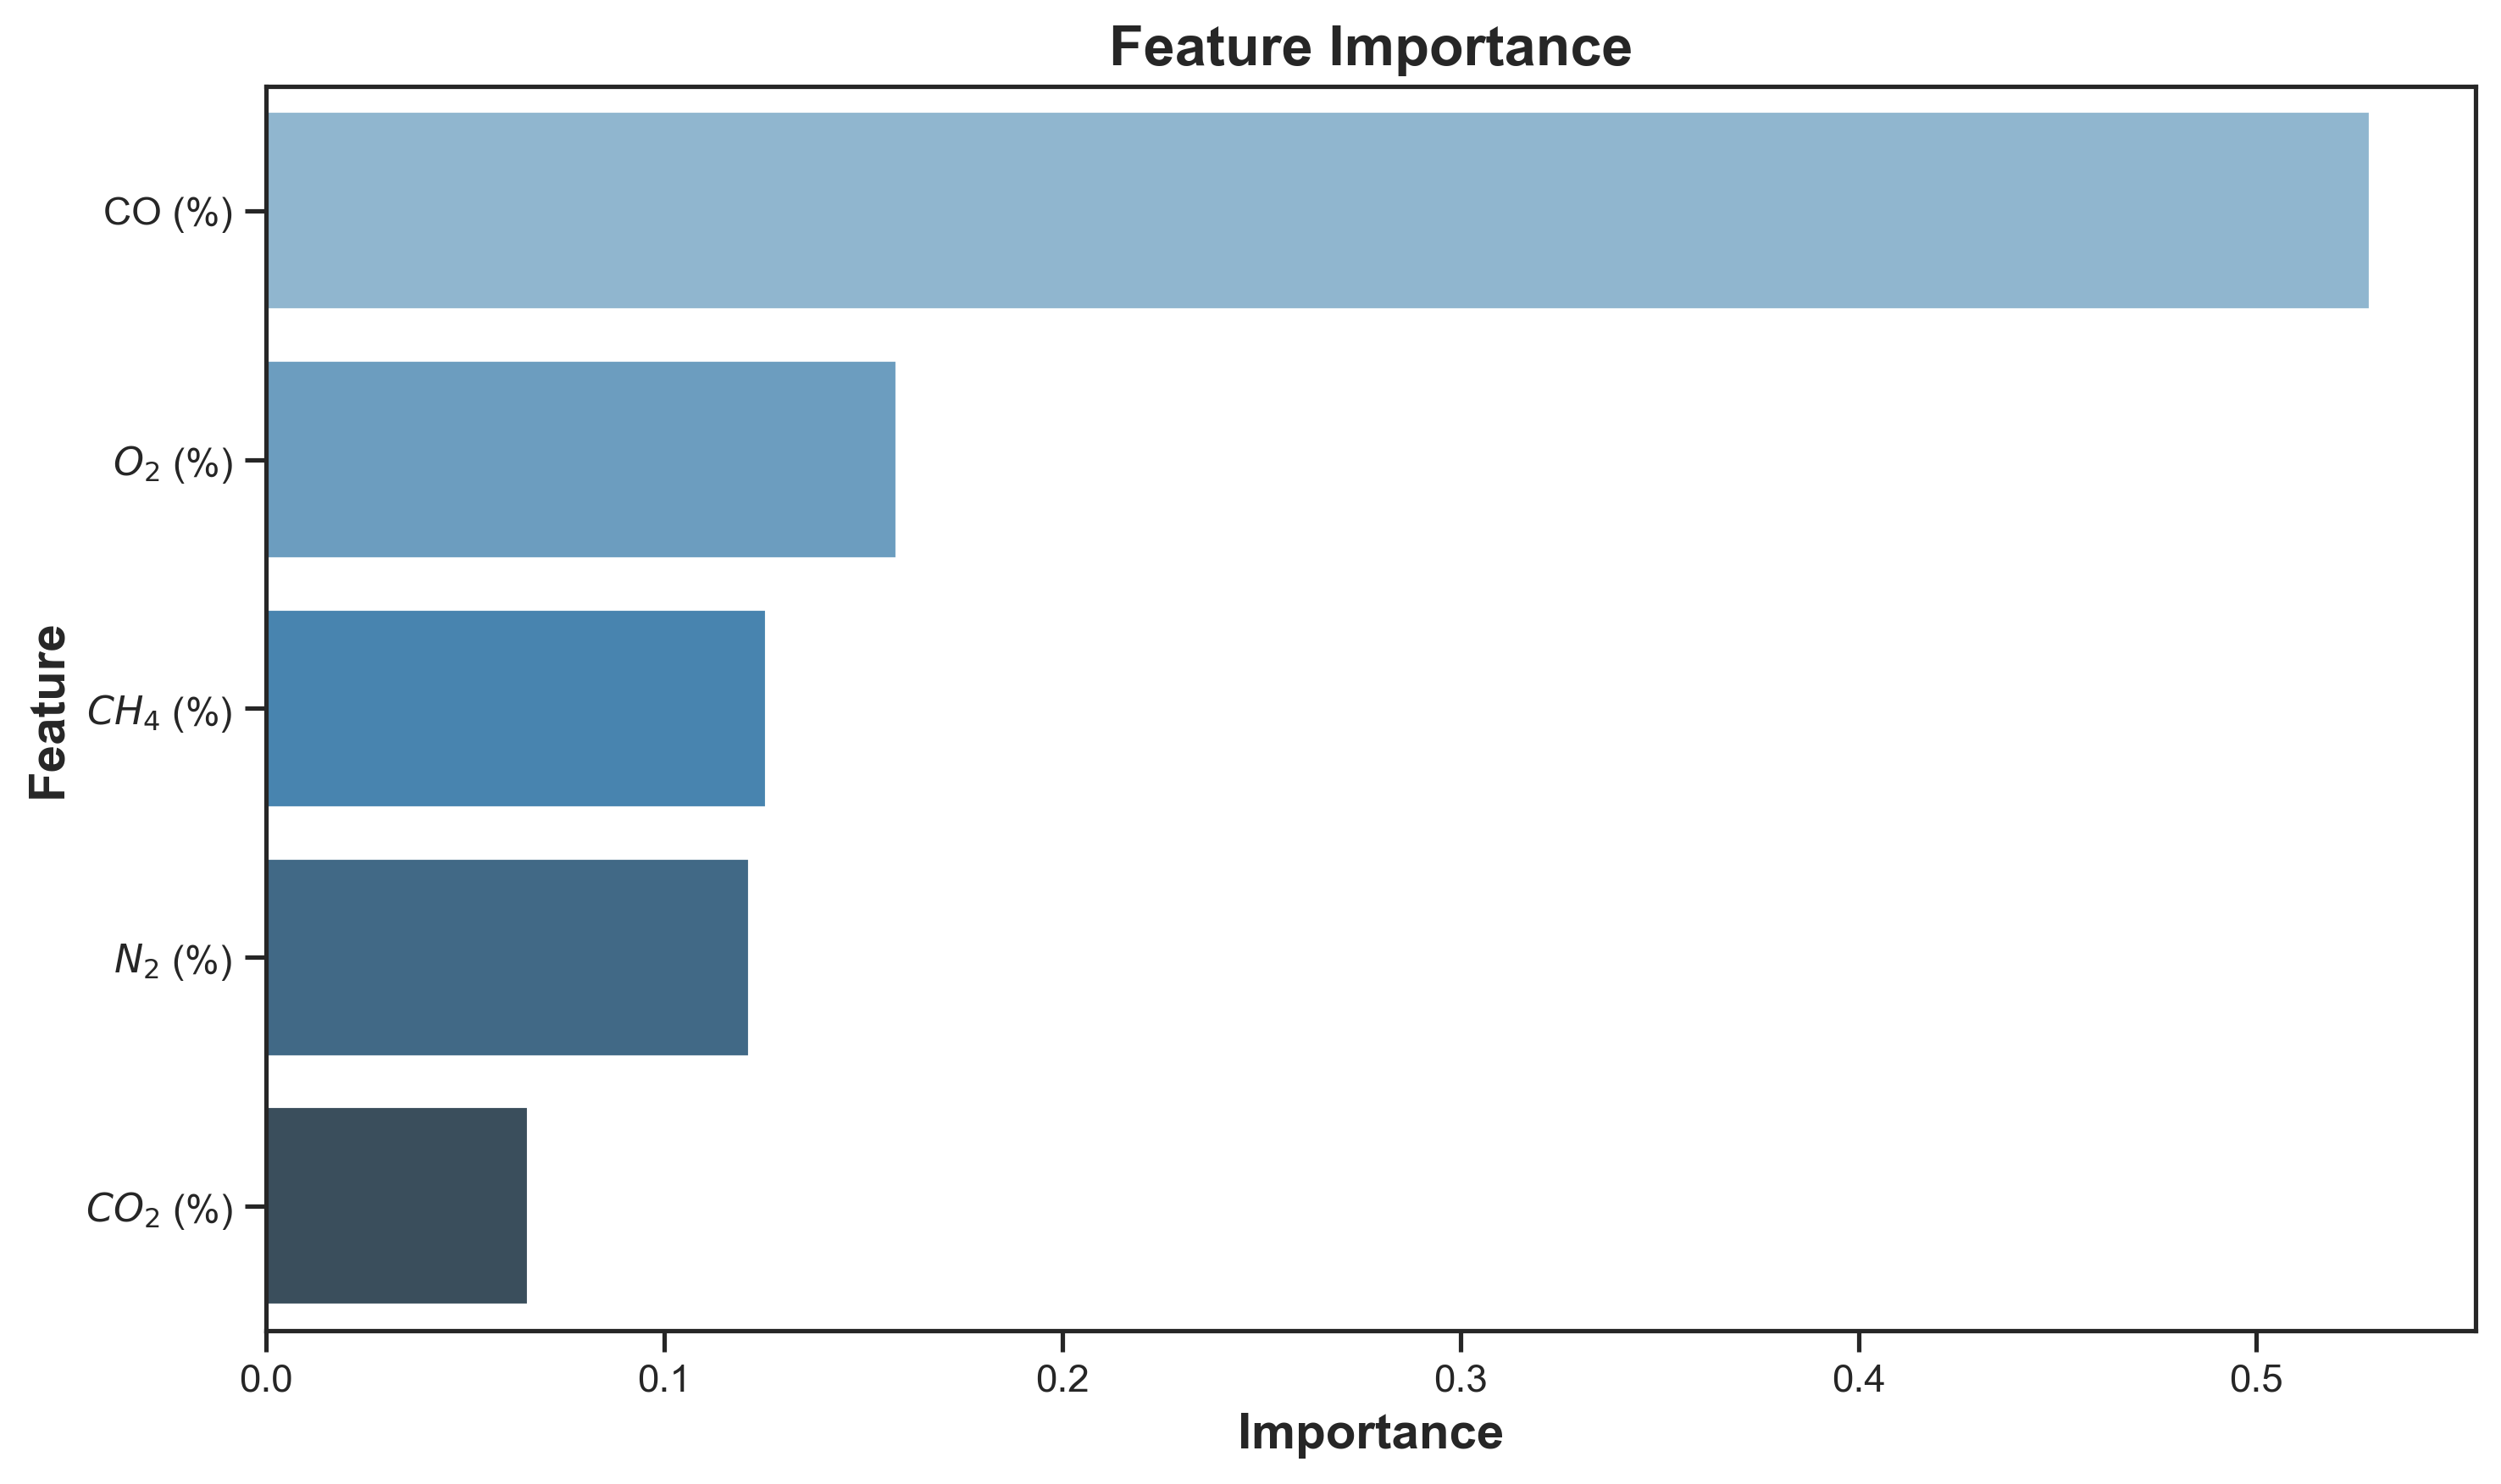

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, roc_curve, auc)
from sklearn.preprocessing import label_binarize
import time

# Define features and target
X = df.drop(columns=['Class'])  # Replace 'Class' with your actual column name if different
y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize XGBoost classifier
num_classes = len(np.unique(y))  # Get the number of classes
model = xgb.XGBClassifier(objective='multi:softprob', n_estimators=50, max_depth=3,
                          learning_rate=0.1, random_state=42, num_class=num_classes)

# Measure training time
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Fit model on full training data and evaluate on test data
model.fit(X_train, y_train)

# Make predictions for training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate performance metrics for training
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='weighted')
train_recall = recall_score(y_train, train_predictions, average='weighted')
train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Calculate performance metrics for testing
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Prepare the performance metrics data
performance_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time (s)'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1, training_time],
    'Test': [test_accuracy, test_precision, test_recall, test_f1, None]
}

# Create DataFrame for performance metrics
performance_df = pd.DataFrame(performance_data)

# Prepare observed vs predicted classes along with input features for training and testing
train_data = X_train.copy()
train_data['Observed'] = y_train
train_data['Predicted'] = train_predictions

test_data = X_test.copy()
test_data['Observed'] = y_test
test_data['Predicted'] = test_predictions

# Model name for sheet-specific naming
model_name = 'XGBoost_model'

# Save results to Excel
with pd.ExcelWriter(f'{model_name}_Classification_results.xlsx') as writer:
    performance_df.to_excel(writer, sheet_name='XGBoost', index=False)
    train_data.to_excel(writer, sheet_name='Train_Observed_vs_Predicted', index=False)
    test_data.to_excel(writer, sheet_name='Test_Observed_vs_Predicted', index=False)

# Save the trained model as a joblib file
joblib.dump(model, f'{model_name}.joblib')

# Calculate performance metrics for training
train_conf_matrix = confusion_matrix(y_train, train_predictions)

print("Performance Metrics (Training):")
print(f"Accuracy: {train_accuracy:.4f}")
print("Confusion Matrix:")
print(train_conf_matrix)

# Calculate performance metrics for testing
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print("\nPerformance Metrics (Testing):")
print(f"Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)

# ------------------------------- AUROC Curve Plot -------------------------------
# Compute probabilities for AUROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_score = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6), dpi=300)
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i % len(colors)], lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)

# Beautify AUROC plot
plt.xlabel("False Positive Rate", fontsize=12, fontweight='bold')
plt.ylabel("True Positive Rate", fontsize=12, fontweight='bold')
plt.title("AUROC Curve", fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(False)
plt.tight_layout()
plt.show()

# ------------------------------- Side-by-Side Confusion Matrix (High DPI) -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

# Training Confusion Matrix
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title("Confusion Matrix (Training)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Predicted Label", fontsize=12, fontweight='bold')
axes[0].set_ylabel("True Label", fontsize=12, fontweight='bold')

# Testing Confusion Matrix
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title("Confusion Matrix (Testing)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Predicted Label", fontsize=12, fontweight='bold')
axes[1].set_ylabel("True Label", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Define symbolic feature names
#feature_names = ['$O_2$ (%)', 'CO (%)', '$CH_4$ (%)', '$CO_2$ (%)', '$H_2$ (%)', '$N_2$ (%)', 'Class']

# Access feature importance and plot it
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Get the feature importance from the trained model
importances = model.feature_importances_

# Create a DataFrame to display feature names and their corresponding importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names[:-1],  # Exclude 'Class' as it's not used for feature importance
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance as a bar chart
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_d')

# Beautify the plot for publication quality
plt.title("Feature Importance", fontsize=16, fontweight='bold')
plt.xlabel("Importance", fontsize=14, fontweight='bold')
plt.ylabel("Feature", fontsize=14, fontweight='bold')

# Customize the y-axis to display features with symbolic names (already in LaTeX format)
plt.tight_layout()
plt.show()

3. LSTM

4/4 [==============================] - 1s 2ms/step - loss: 5.8059 - accuracy: 0.0303
Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 4.2632 - accuracy: 0.0808
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 3.2741 - accuracy: 0.3131
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 2.4061 - accuracy: 0.2424
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.6811 - accuracy: 0.3636
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2624 - accuracy: 0.5152
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.2021 - accuracy: 0.4646
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2176 - accuracy: 0.4444
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1783 - accuracy: 0.5657
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1443 - accuracy: 0.6061
Epoch 10/100
4/4 [========================

c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


INFO:tensorflow:Assets written to: ram://44e6ac98-7d5d-4a14-942d-93f6c64792bf/assets
Performance Metrics (Training):
Accuracy: 0.7071
Confusion Matrix:
[[28  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 2  0  0  1  0  0]
 [ 9  0  0  4  0  1]
 [ 4  0  0  0  0  5]
 [ 4  0  0  2  0 38]]

Performance Metrics (Testing):
Accuracy: 0.7442
Confusion Matrix:
[[14  0  0  0  0]
 [ 3  0  0  0  0]
 [ 4  0  2  0  1]
 [ 2  0  0  0  0]
 [ 0  0  1  0 16]]


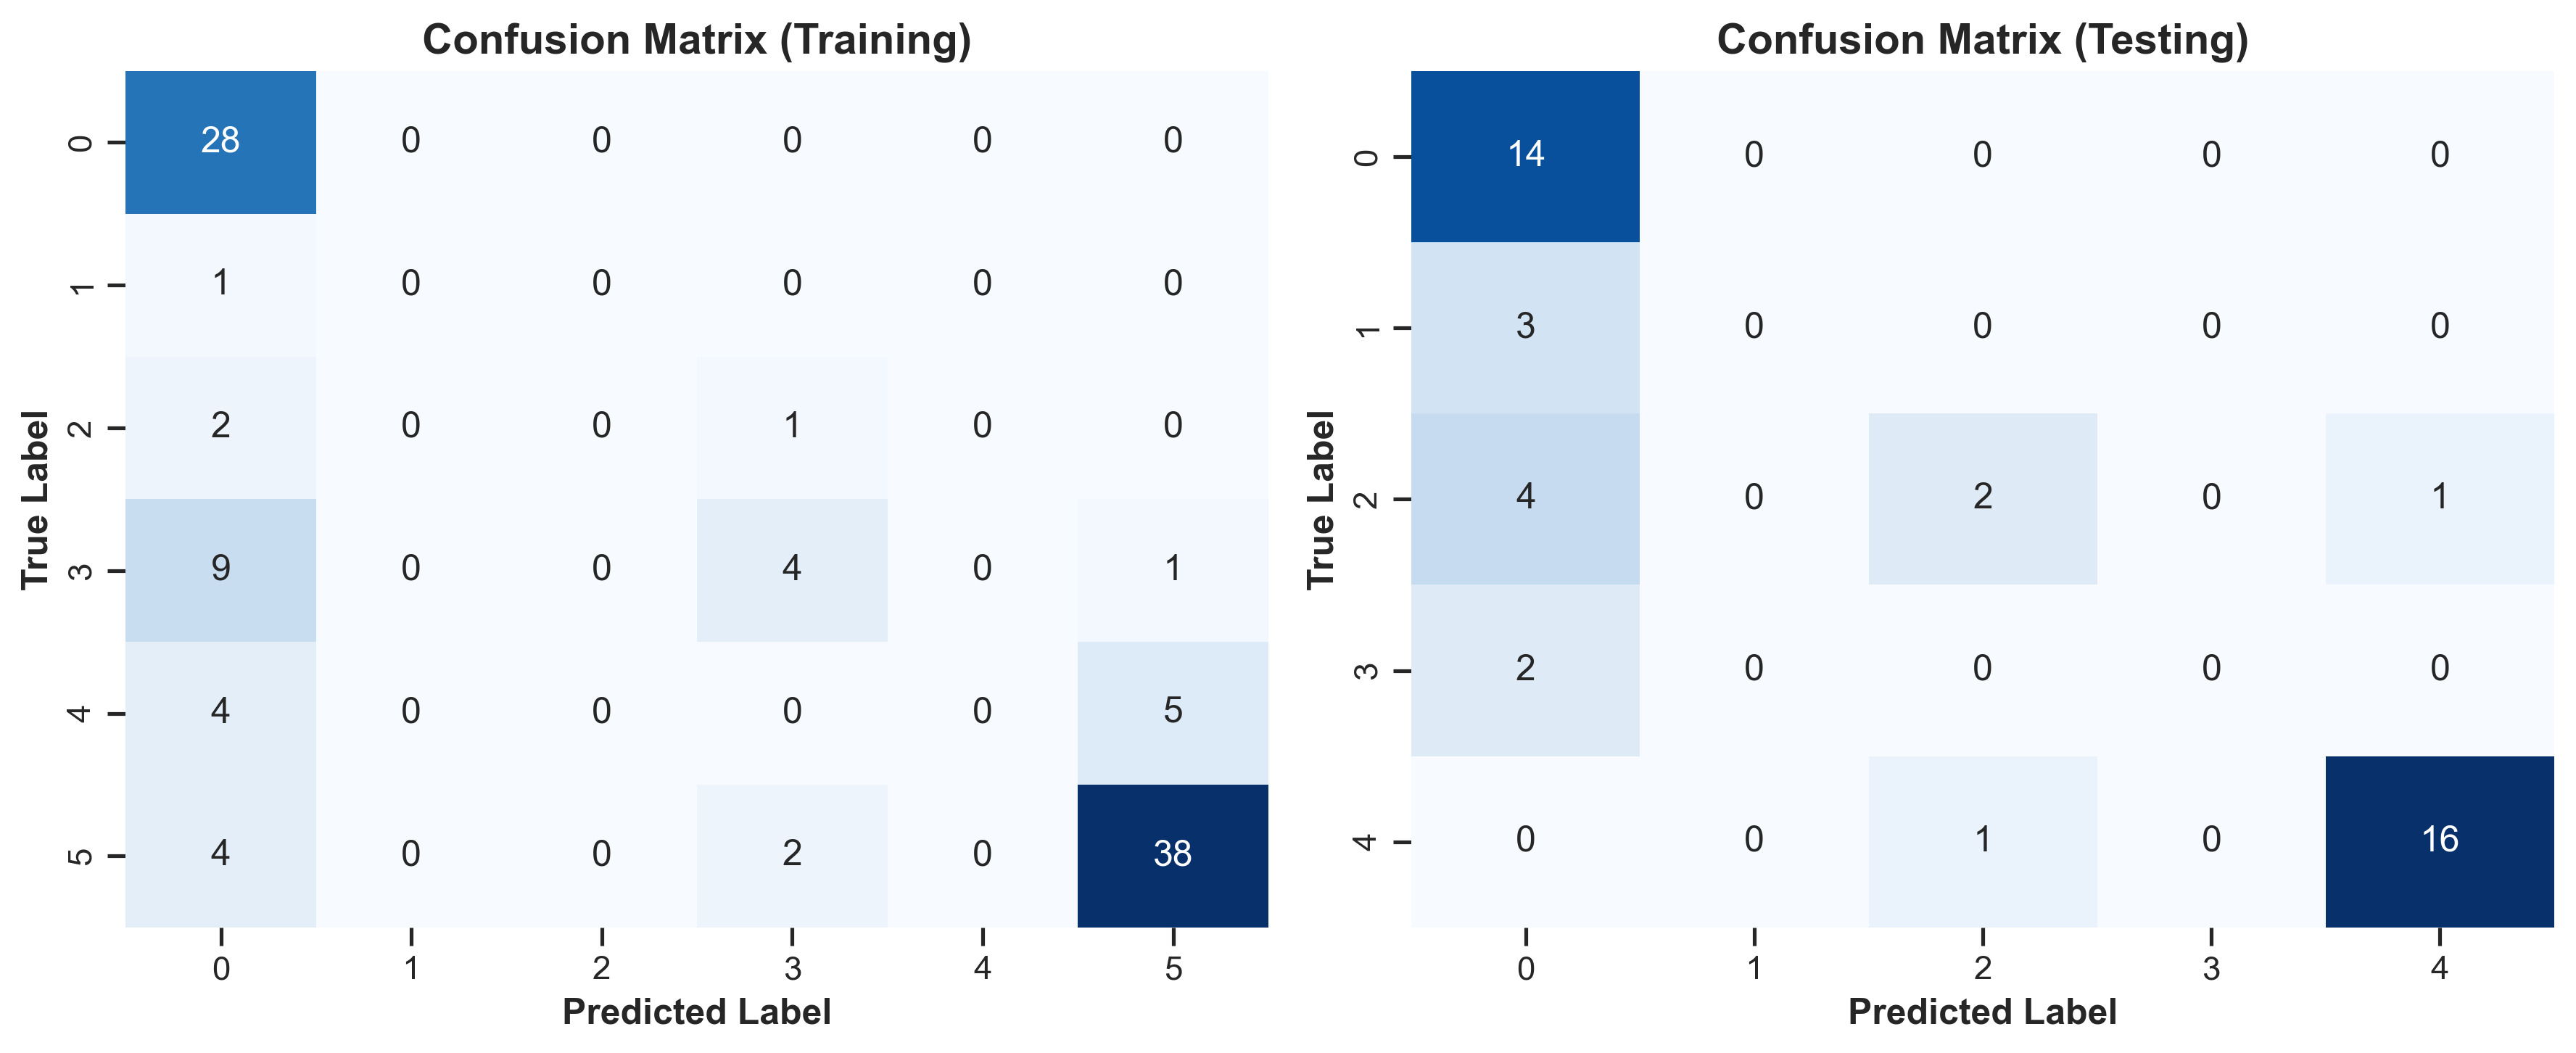

In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import joblib

# Define features and target
X = df.drop(columns=['Class'])  # Replace 'Class' with your actual column name if different
#y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Reshape data for LSTM: samples, timesteps, features
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Initialize LSTM model
model = Sequential()

# Add LSTM layer and Dense output layer
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(6, activation='softmax'))  # Change the number of output units based on the number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Measure training time
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Fit the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions for training and testing data
train_predictions = model.predict(X_train)
train_predictions = np.argmax(train_predictions, axis=1)  # Convert from probabilities to class predictions
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# Calculate performance metrics for training
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions, average='weighted')
train_recall = recall_score(y_train, train_predictions, average='weighted')
train_f1 = f1_score(y_train, train_predictions, average='weighted')

# Calculate performance metrics for testing
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')

# Prepare the performance metrics data
performance_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score','Training Time (s)'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1, training_time],
    'Test': [test_accuracy, test_precision, test_recall, test_f1, None]
}

# Create DataFrame for performance metrics
performance_df = pd.DataFrame(performance_data)

# Prepare observed vs predicted classes along with input features for training and testing
train_data = X_train.reshape(X_train.shape[0], X_train.shape[2])
train_data = pd.DataFrame(train_data)
train_data['Observed'] = y_train
train_data['Predicted'] = train_predictions

test_data = X_test.reshape(X_test.shape[0], X_test.shape[2])
test_data = pd.DataFrame(test_data)
test_data['Observed'] = y_test
test_data['Predicted'] = test_predictions

# Model name for sheet-specific naming
model_name = 'LSTM_model'

# Save results to Excel
with pd.ExcelWriter(f'{model_name}_Classification_results.xlsx') as writer:
    performance_df.to_excel(writer, sheet_name='LSTM', index=False)
    train_data.to_excel(writer, sheet_name='Train_Observed_vs_Predicted', index=False)
    test_data.to_excel(writer, sheet_name='Test_Observed_vs_Predicted', index=False)

# Save the trained model as a joblib file
joblib.dump(model, f'{model_name}.joblib')

# Calculate performance metrics for training
train_conf_matrix = confusion_matrix(y_train, train_predictions)

print("Performance Metrics (Training):")
print(f"Accuracy: {train_accuracy:.4f}")
print("Confusion Matrix:")
print(train_conf_matrix)

# Calculate performance metrics for testing
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print("\nPerformance Metrics (Testing):")
print(f"Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)


# ------------------------------- Side-by-Side Confusion Matrix (High DPI) -------------------------------
train_conf_matrix = confusion_matrix(y_train, train_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

# Training Confusion Matrix
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title("Confusion Matrix (Training)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Predicted Label", fontsize=12, fontweight='bold')
axes[0].set_ylabel("True Label", fontsize=12, fontweight='bold')

# Testing Confusion Matrix
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title("Confusion Matrix (Testing)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Predicted Label", fontsize=12, fontweight='bold')
axes[1].set_ylabel("True Label", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ------------------------------- AUROC Curve -------------------------------
if len(set(y)) == 2:  # Only for binary classification
    train_probs = model.predict_proba(X_train)[:, 1]
    test_probs = model.predict_proba(X_test)[:, 1]

    train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
    test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)

    plt.figure(figsize=(7, 6), dpi=300)
    plt.plot(train_fpr, train_tpr, linestyle='--', color='blue', label=f'Training (AUC = {train_auc:.3f})')
    plt.plot(test_fpr, test_tpr, linestyle='-', color='red', label=f'Testing (AUC = {test_auc:.3f})')
    plt.plot([0, 1], [0, 1], linestyle='dashed', color='gray')

    plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    plt.title('AUROC Curve', fontsize=14, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(False)
    plt.show()

4. XGBoost+LSTM

C:\Users\satya\AppData\Roaming\Python\Python310\site-packages\xgboost\core.py:158: UserWarning: [10:47:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Epoch 1/100
4/4 [==============================] - 1s 1ms/step - loss: 1.7847 - accuracy: 0.2525
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.7748 - accuracy: 0.5152
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.7654 - accuracy: 0.5152
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 1.7557 - accuracy: 0.5152
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 1.7462 - accuracy: 0.9495
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.7369 - accuracy: 0.9596
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 1.7272 - accuracy: 0.9596
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 1.7179 - accuracy: 0.9596
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 1.7082 - accuracy: 0.9596
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 1.6986 - accuracy: 0.9596
Epoch 11/100
4/4 [===========

c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


INFO:tensorflow:Assets written to: ram://76d7fd03-733c-4179-ad49-8f7423ae35bc/assets
Performance Metrics (Training):
Accuracy: 0.9596
Confusion Matrix:
[[28  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 44]]

Performance Metrics (Testing):
Accuracy: 0.8372
Confusion Matrix:
[[14  0  0  0  0]
 [ 0  0  2  0  1]
 [ 0  0  5  1  1]
 [ 0  0  0  1  1]
 [ 0  0  0  1 16]]


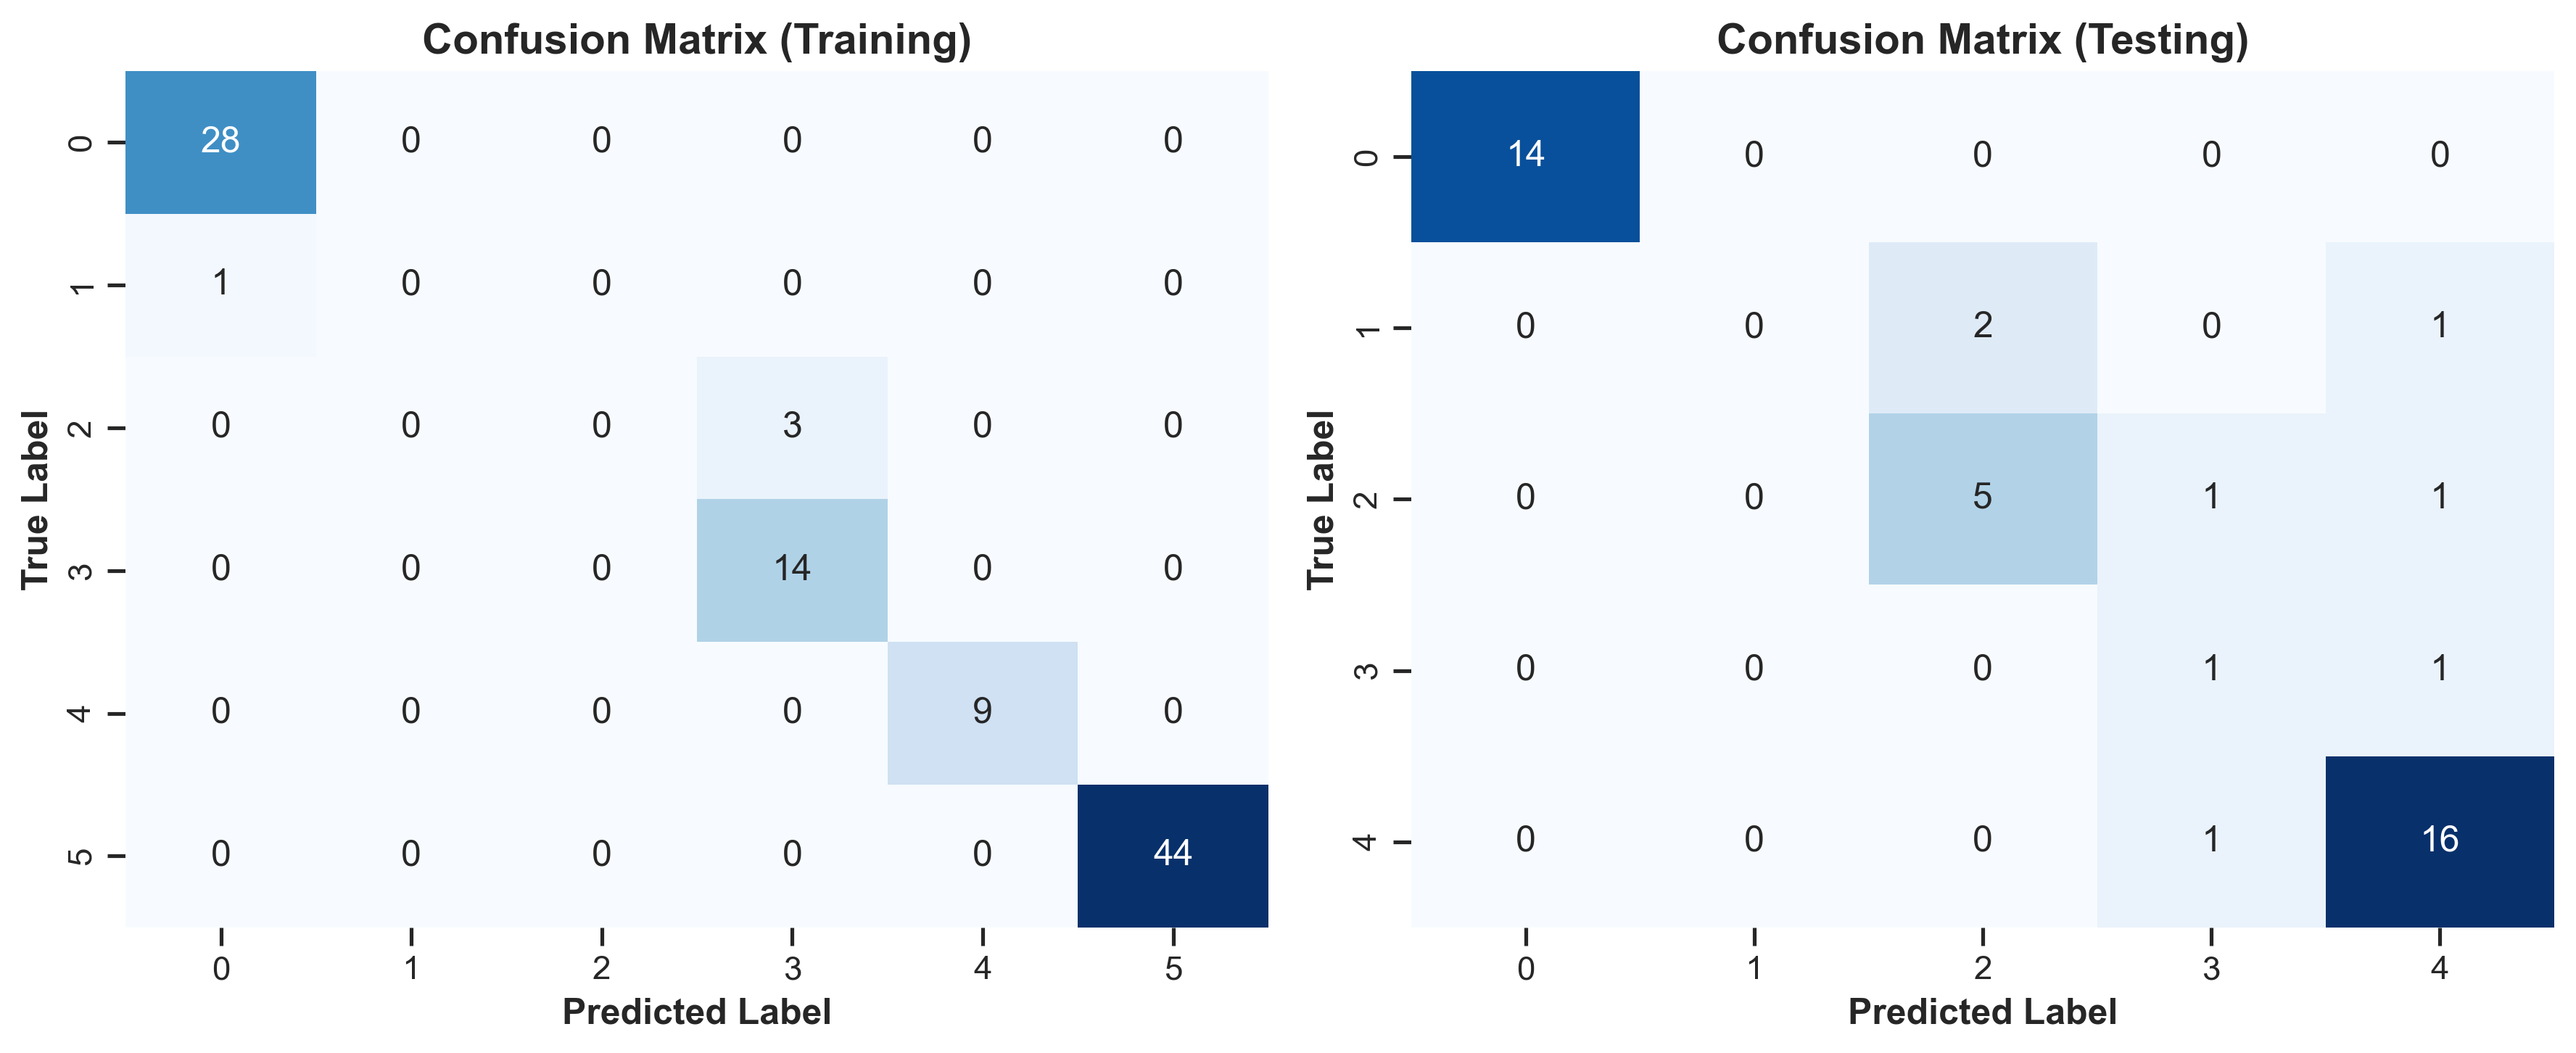

Training Confusion Matrix:
[[28  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 44]]

Testing Confusion Matrix:
[[14  0  0  0  0]
 [ 0  0  2  0  1]
 [ 0  0  5  1  1]
 [ 0  0  0  1  1]
 [ 0  0  0  1 16]]


In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import joblib

# Define features and target
X = df.drop(columns=['Class'])  # Replace 'Class' with your actual column name if different
y = df['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 1. Train XGBoost model for feature extraction
xgboost_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
xgboost_model.fit(X_train, y_train)

# Get predictions from XGBoost model
train_predictions_xgb = xgboost_model.predict_proba(X_train)  # Probability predictions for training set
test_predictions_xgb = xgboost_model.predict_proba(X_test)  # Probability predictions for testing set

# Reshape predictions to be the input for the LSTM
X_train_lstm = train_predictions_xgb.reshape((train_predictions_xgb.shape[0], 1, train_predictions_xgb.shape[1]))
X_test_lstm = test_predictions_xgb.reshape((test_predictions_xgb.shape[0], 1, test_predictions_xgb.shape[1]))

# 2. Initialize LSTM model
lstm_model = Sequential()

# Add LSTM layer and Dense output layer
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(6, activation='softmax'))  # Change the number of output units based on the number of classes

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. Fit the LSTM model using the XGBoost predictions as input
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=1)

# 4. Make predictions for training and testing data
train_predictions_lstm = lstm_model.predict(X_train_lstm)
train_predictions_lstm = np.argmax(train_predictions_lstm, axis=1)  # Convert from probabilities to class predictions

test_predictions_lstm = lstm_model.predict(X_test_lstm)
test_predictions_lstm = np.argmax(test_predictions_lstm, axis=1)

# 5. Calculate performance metrics for training
train_accuracy = accuracy_score(y_train, train_predictions_lstm)
train_precision = precision_score(y_train, train_predictions_lstm, average='weighted')
train_recall = recall_score(y_train, train_predictions_lstm, average='weighted')
train_f1 = f1_score(y_train, train_predictions_lstm, average='weighted')

# Calculate performance metrics for testing
test_accuracy = accuracy_score(y_test, test_predictions_lstm)
test_precision = precision_score(y_test, test_predictions_lstm, average='weighted')
test_recall = recall_score(y_test, test_predictions_lstm, average='weighted')
test_f1 = f1_score(y_test, test_predictions_lstm, average='weighted')

# Prepare the performance metrics data
performance_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
}

# Create DataFrame for performance metrics
performance_df = pd.DataFrame(performance_data)

# Prepare observed vs predicted classes along with input features for training and testing
train_data = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[2])
train_data = pd.DataFrame(train_data)
train_data['Observed'] = y_train
train_data['Predicted'] = train_predictions_lstm

test_data = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[2])
test_data = pd.DataFrame(test_data)
test_data['Observed'] = y_test
test_data['Predicted'] = test_predictions_lstm

# Model name for sheet-specific naming
model_name = 'Hybrid_XGBoost_LSTM_model'

# Save results to Excel
with pd.ExcelWriter(f'{model_name}_Classification_results.xlsx') as writer:
    performance_df.to_excel(writer, sheet_name='Hybrid Model', index=False)
    train_data.to_excel(writer, sheet_name='Train_Observed_vs_Predicted', index=False)
    test_data.to_excel(writer, sheet_name='Test_Observed_vs_Predicted', index=False)

# Save the trained model as a joblib file
joblib.dump(model, f'{model_name}.joblib')

# Calculate performance metrics for training
train_conf_matrix = confusion_matrix(y_train, train_predictions_lstm)

print("Performance Metrics (Training):")
print(f"Accuracy: {train_accuracy:.4f}")
print("Confusion Matrix:")
print(train_conf_matrix)

# Calculate performance metrics for testing
test_conf_matrix = confusion_matrix(y_test, test_predictions_lstm)

print("\nPerformance Metrics (Testing):")
print(f"Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)

# 7. Display confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training Confusion Matrix
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title("Confusion Matrix (Training)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Predicted Label", fontsize=12, fontweight='bold')
axes[0].set_ylabel("True Label", fontsize=12, fontweight='bold')

# Testing Confusion Matrix
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title("Confusion Matrix (Testing)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Predicted Label", fontsize=12, fontweight='bold')
axes[1].set_ylabel("True Label", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print confusion matrices
print("Training Confusion Matrix:")
print(train_conf_matrix)
print("\nTesting Confusion Matrix:")
print(test_conf_matrix)

Explainability of the Models

1. SHAP Explainability Plots

In [85]:
# Load the trained XGBoost model
model_name = 'XGBoost'  # Example model name
model = joblib.load(f'{model_name}_model.joblib')

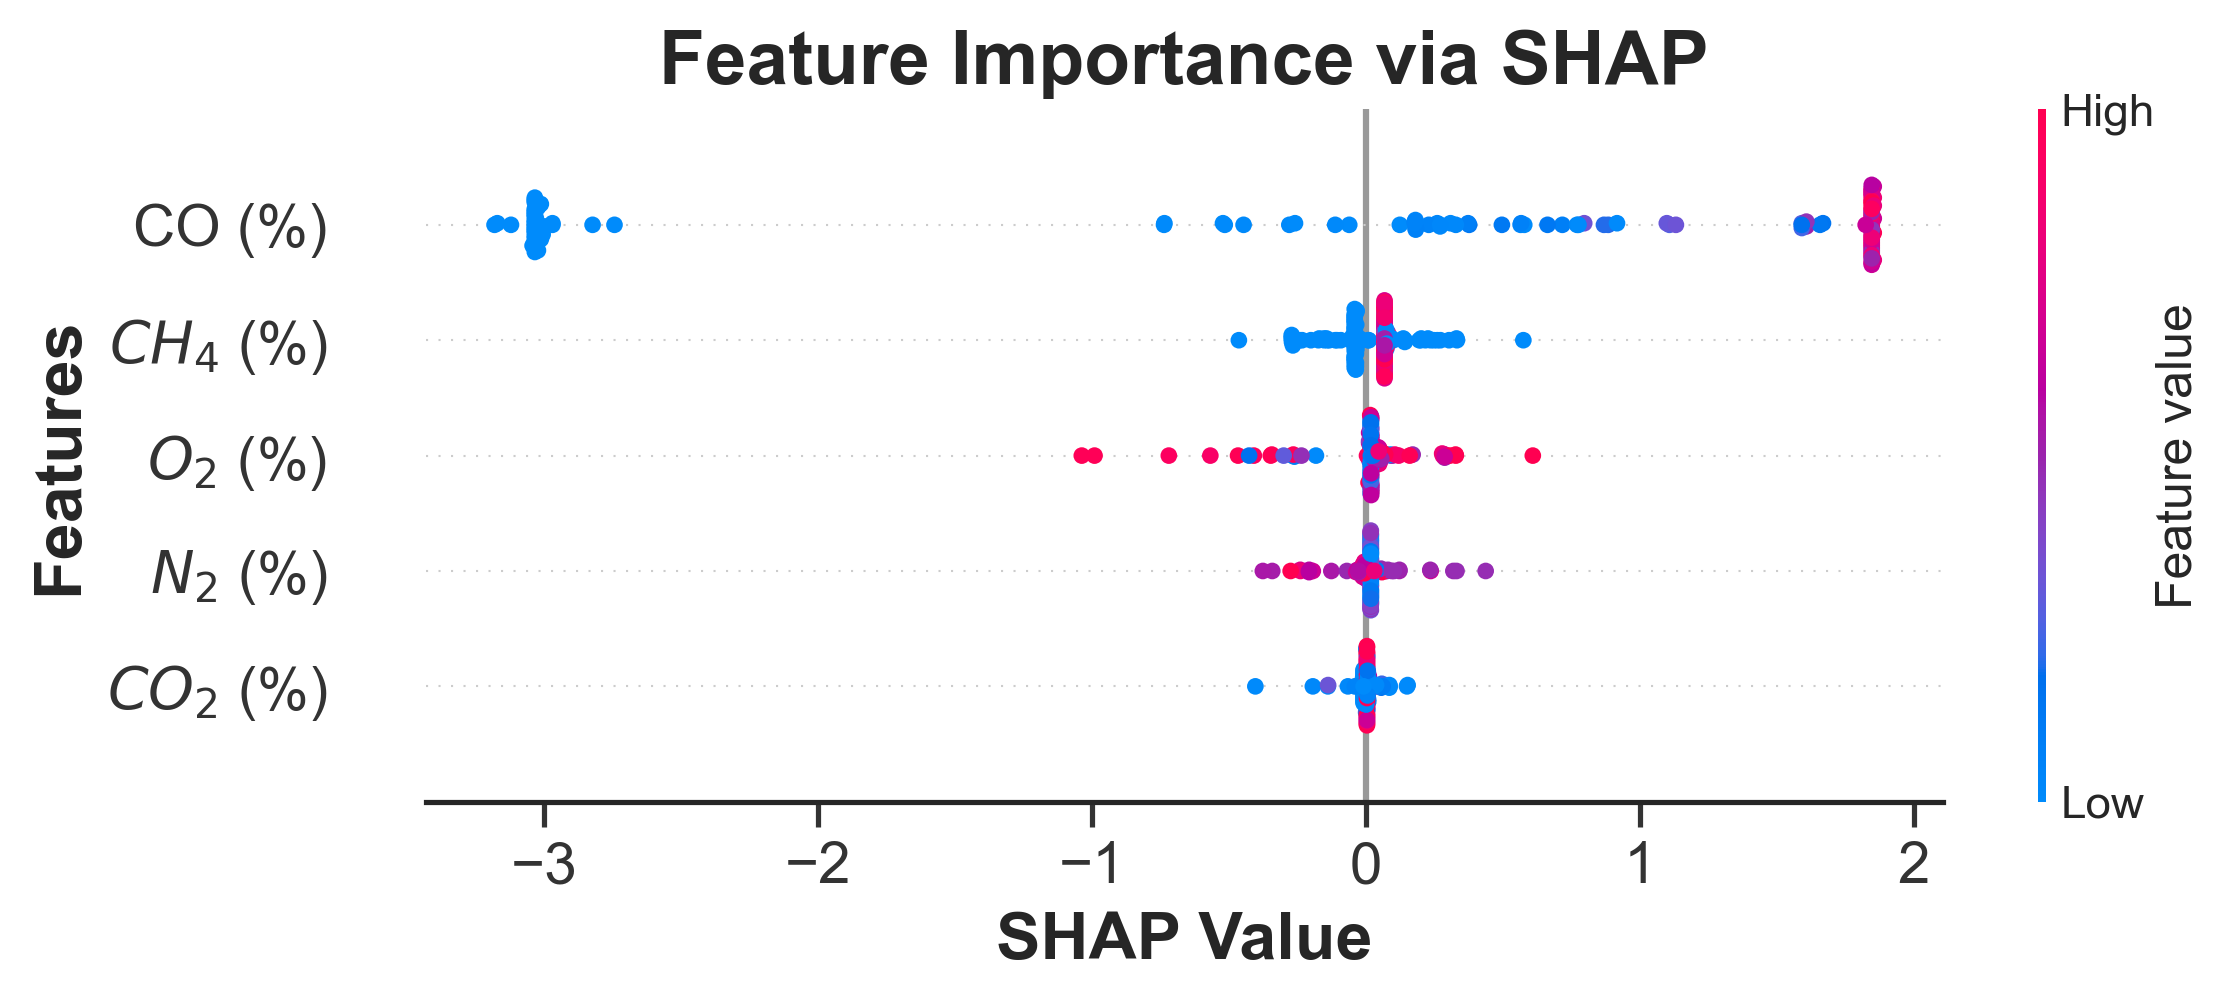

In [87]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Define the original feature names as used during model training
#original_feature_names = ['O2', 'CO', 'CH4', 'CO2', 'H2', 'N2']

# Define LaTeX-formatted feature names for visualization
#feature_names = ['$O_2$ (%)', 'CO (%)', '$CH_4$ (%)', '$CO_2$ (%)', '$H_2$ (%)', '$N_2$ (%)']
feature_names = ['$O_2$ (%)', 'CO (%)', '$CH_4$ (%)', '$CO_2$ (%)', '$N_2$ (%)']

# Create SHAP explainer using the model's predict function
explainer = shap.Explainer(model.predict, X)  # Use the original feature names
shap_values = explainer(X)

# Convert SHAP values into a DataFrame (if needed for further analysis)
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)

# 📌 Summary plot with LaTeX feature names (Only for Visualization)
plt.figure(figsize=(10, 6), dpi=300)
shap.summary_plot(shap_values, X, feature_names=feature_names, show=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("SHAP Value", fontsize=16, fontweight='bold')
plt.ylabel("Features", fontsize=16, fontweight='bold')
plt.title("Feature Importance via SHAP", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

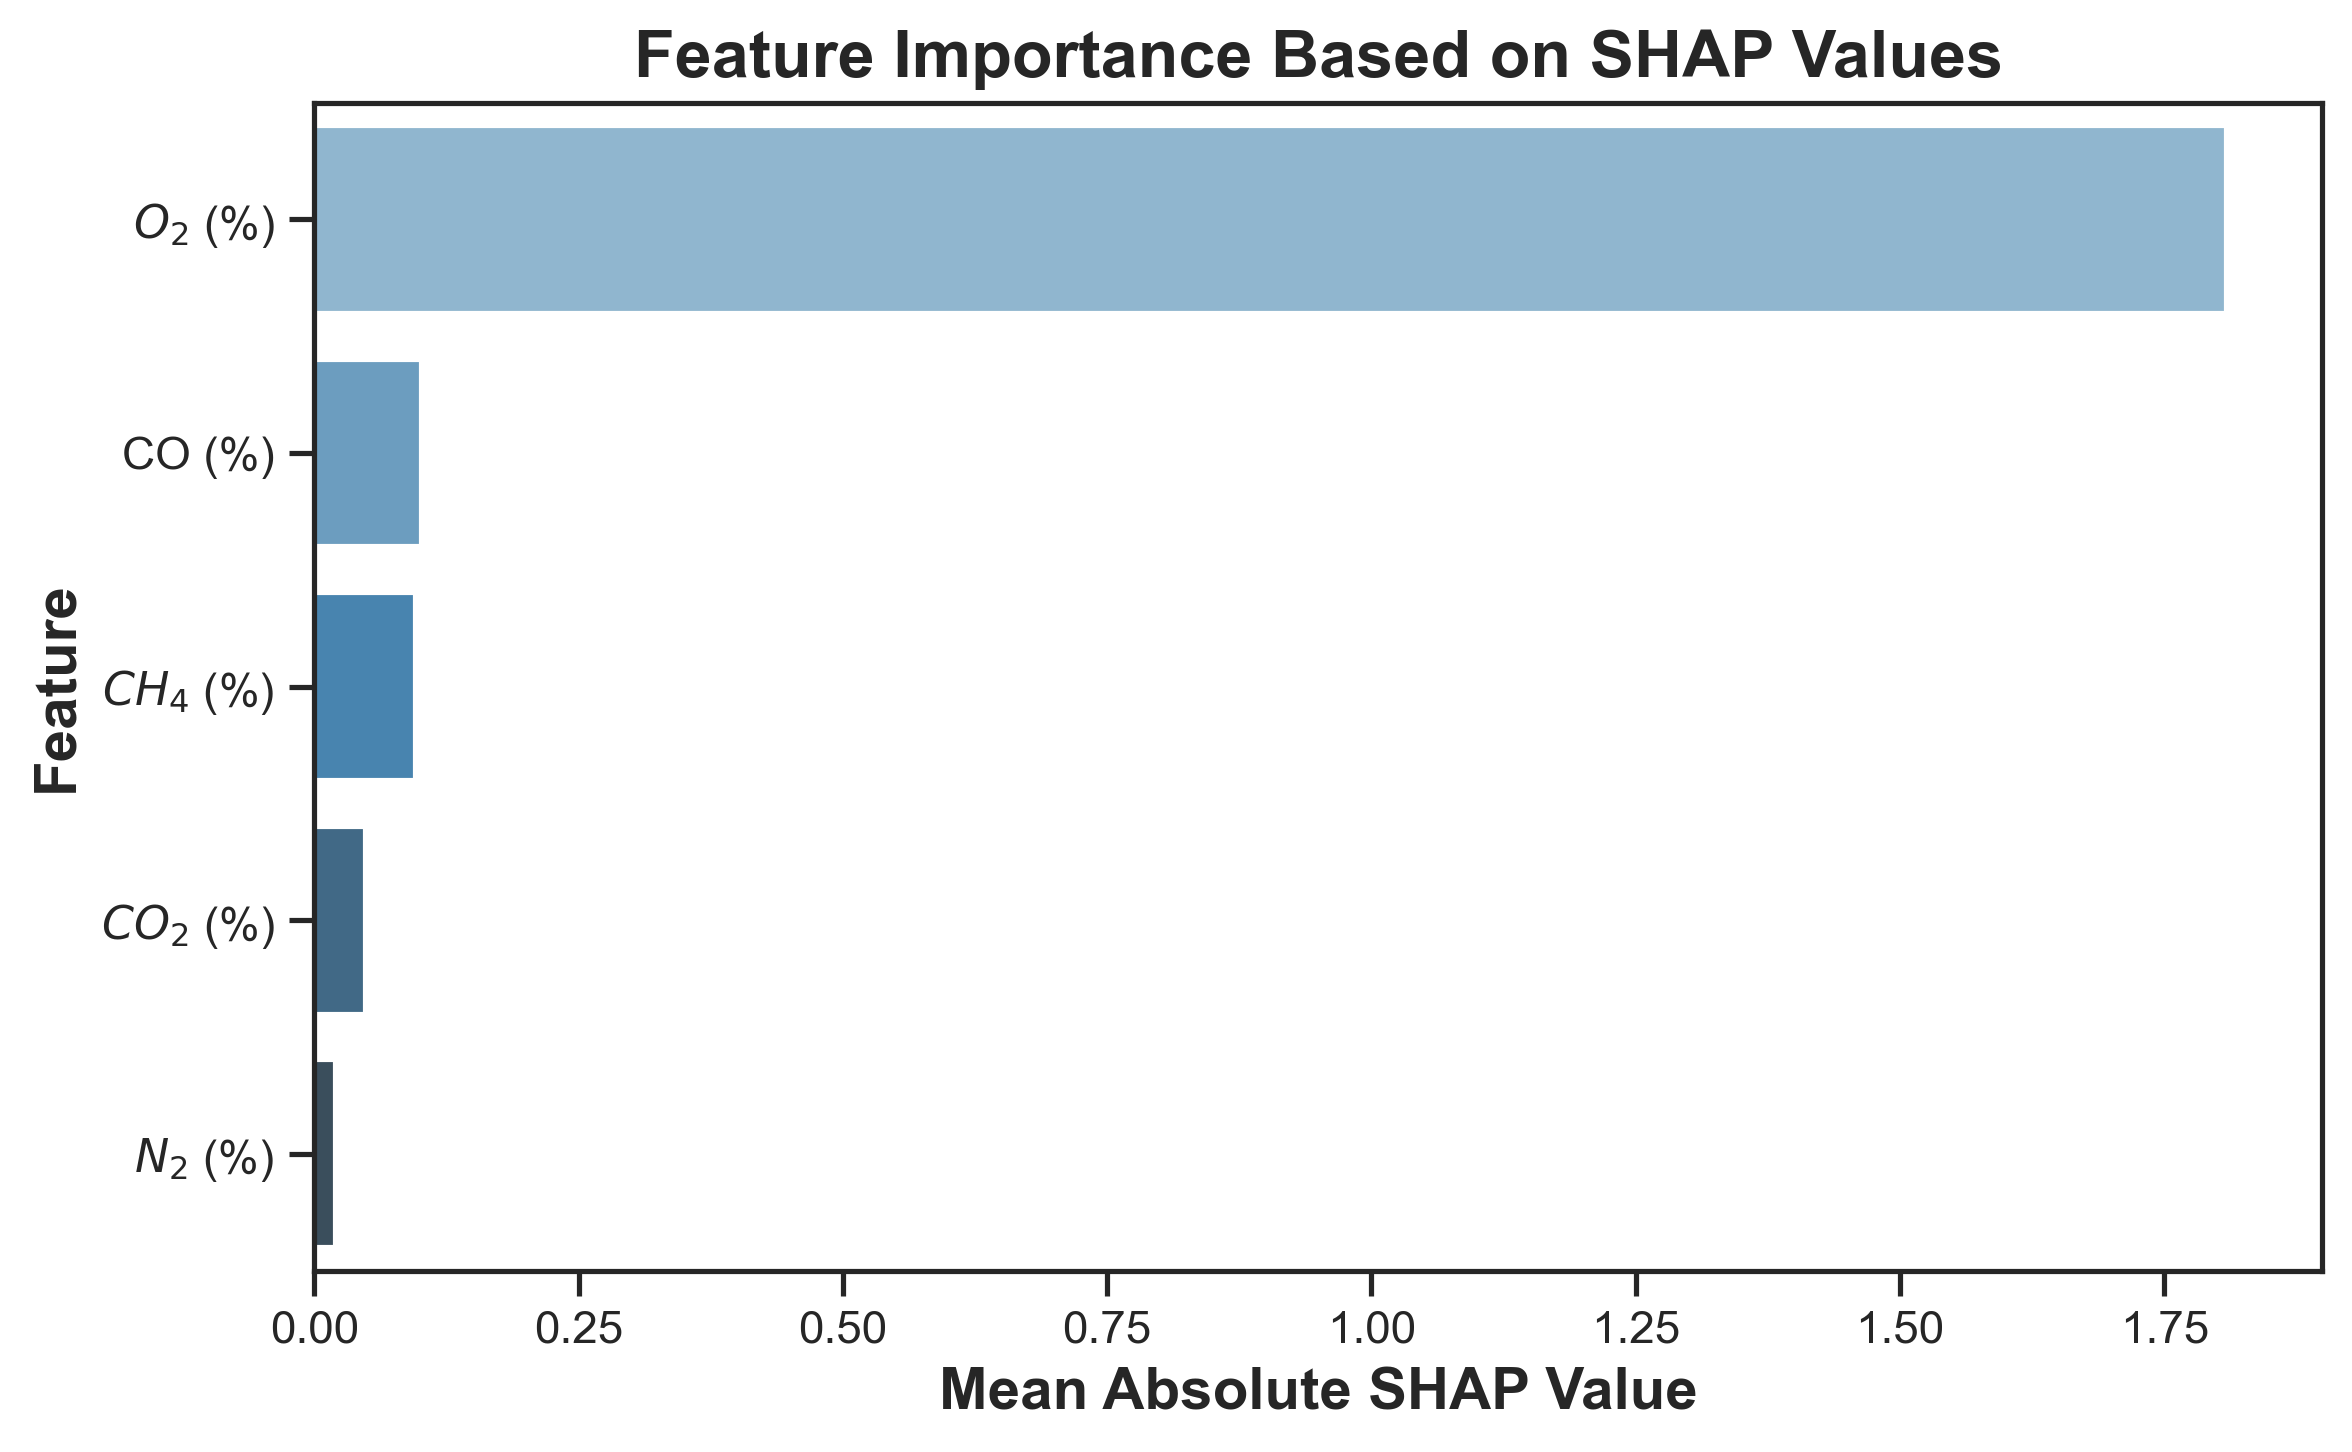

In [88]:
# Compute average absolute SHAP values
shap_mean = np.abs(shap_values.values).mean(axis=0)

# Create DataFrame for plotting
shap_df = pd.DataFrame({'Feature': X.columns, 'Mean SHAP Value': shap_mean})
shap_df = shap_df.sort_values(by="Mean SHAP Value", ascending=False)

# Define feature names with LaTeX formatting
latex_feature_names = ['$O_2$ (%)', 'CO (%)', '$CH_4$ (%)', '$CO_2$ (%)',  '$N_2$ (%)']
shap_df["Feature"] = latex_feature_names  # Replace feature names

# Plot Feature Importance based on SHAP Values
plt.figure(figsize=(8, 5), dpi=300)
sns.barplot(x="Mean SHAP Value", y="Feature", data=shap_df, palette="Blues_d")

# Beautify the plot for publication
plt.xlabel("Mean Absolute SHAP Value", fontsize=14, fontweight='bold')
plt.ylabel("Feature", fontsize=14, fontweight='bold')
plt.title("Feature Importance Based on SHAP Values", fontsize=16, fontweight='bold')
plt.grid(False)  # Remove grid lines
plt.tight_layout()

# Show the plot
plt.show()

In [89]:
import shap
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Or if you want to plot for a specific class (e.g., class index 0):
shap.summary_plot(shap_values[1], X_scaled, feature_names=feature_names, show=False)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_scaled, feature_names=feature_names)

# SHAP Layered Violin Plot
shap.summary_plot(shap_values, X_scaled, feature_names=feature_names, plot_type='violin')

# SHAP Decision Plot
# For binary classification, use expected_value and shap_values directly without indexing
shap.decision_plot(explainer.expected_value, shap_values, X_scaled, feature_names=feature_names)

# SHAP Feature Importance Plot
shap.summary_plot(shap_values, X_scaled, feature_names=feature_names, plot_type='bar')


AssertionError: Summary plots need a matrix of shap_values, not a vector.

3. Parametric sensitivity analysis

C:\Users\satya\AppData\Local\Temp\ipykernel_10588\1038340277.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_results_xgb = sensitivity_results_xgb.append({
C:\Users\satya\AppData\Local\Temp\ipykernel_10588\1038340277.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_results_xgb = sensitivity_results_xgb.append({
C:\Users\satya\AppData\Local\Temp\ipykernel_10588\1038340277.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity_results_xgb = sensitivity_results_xgb.append({
C:\Users\satya\AppData\Local\Temp\ipykernel_10588\1038340277.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sensitivity

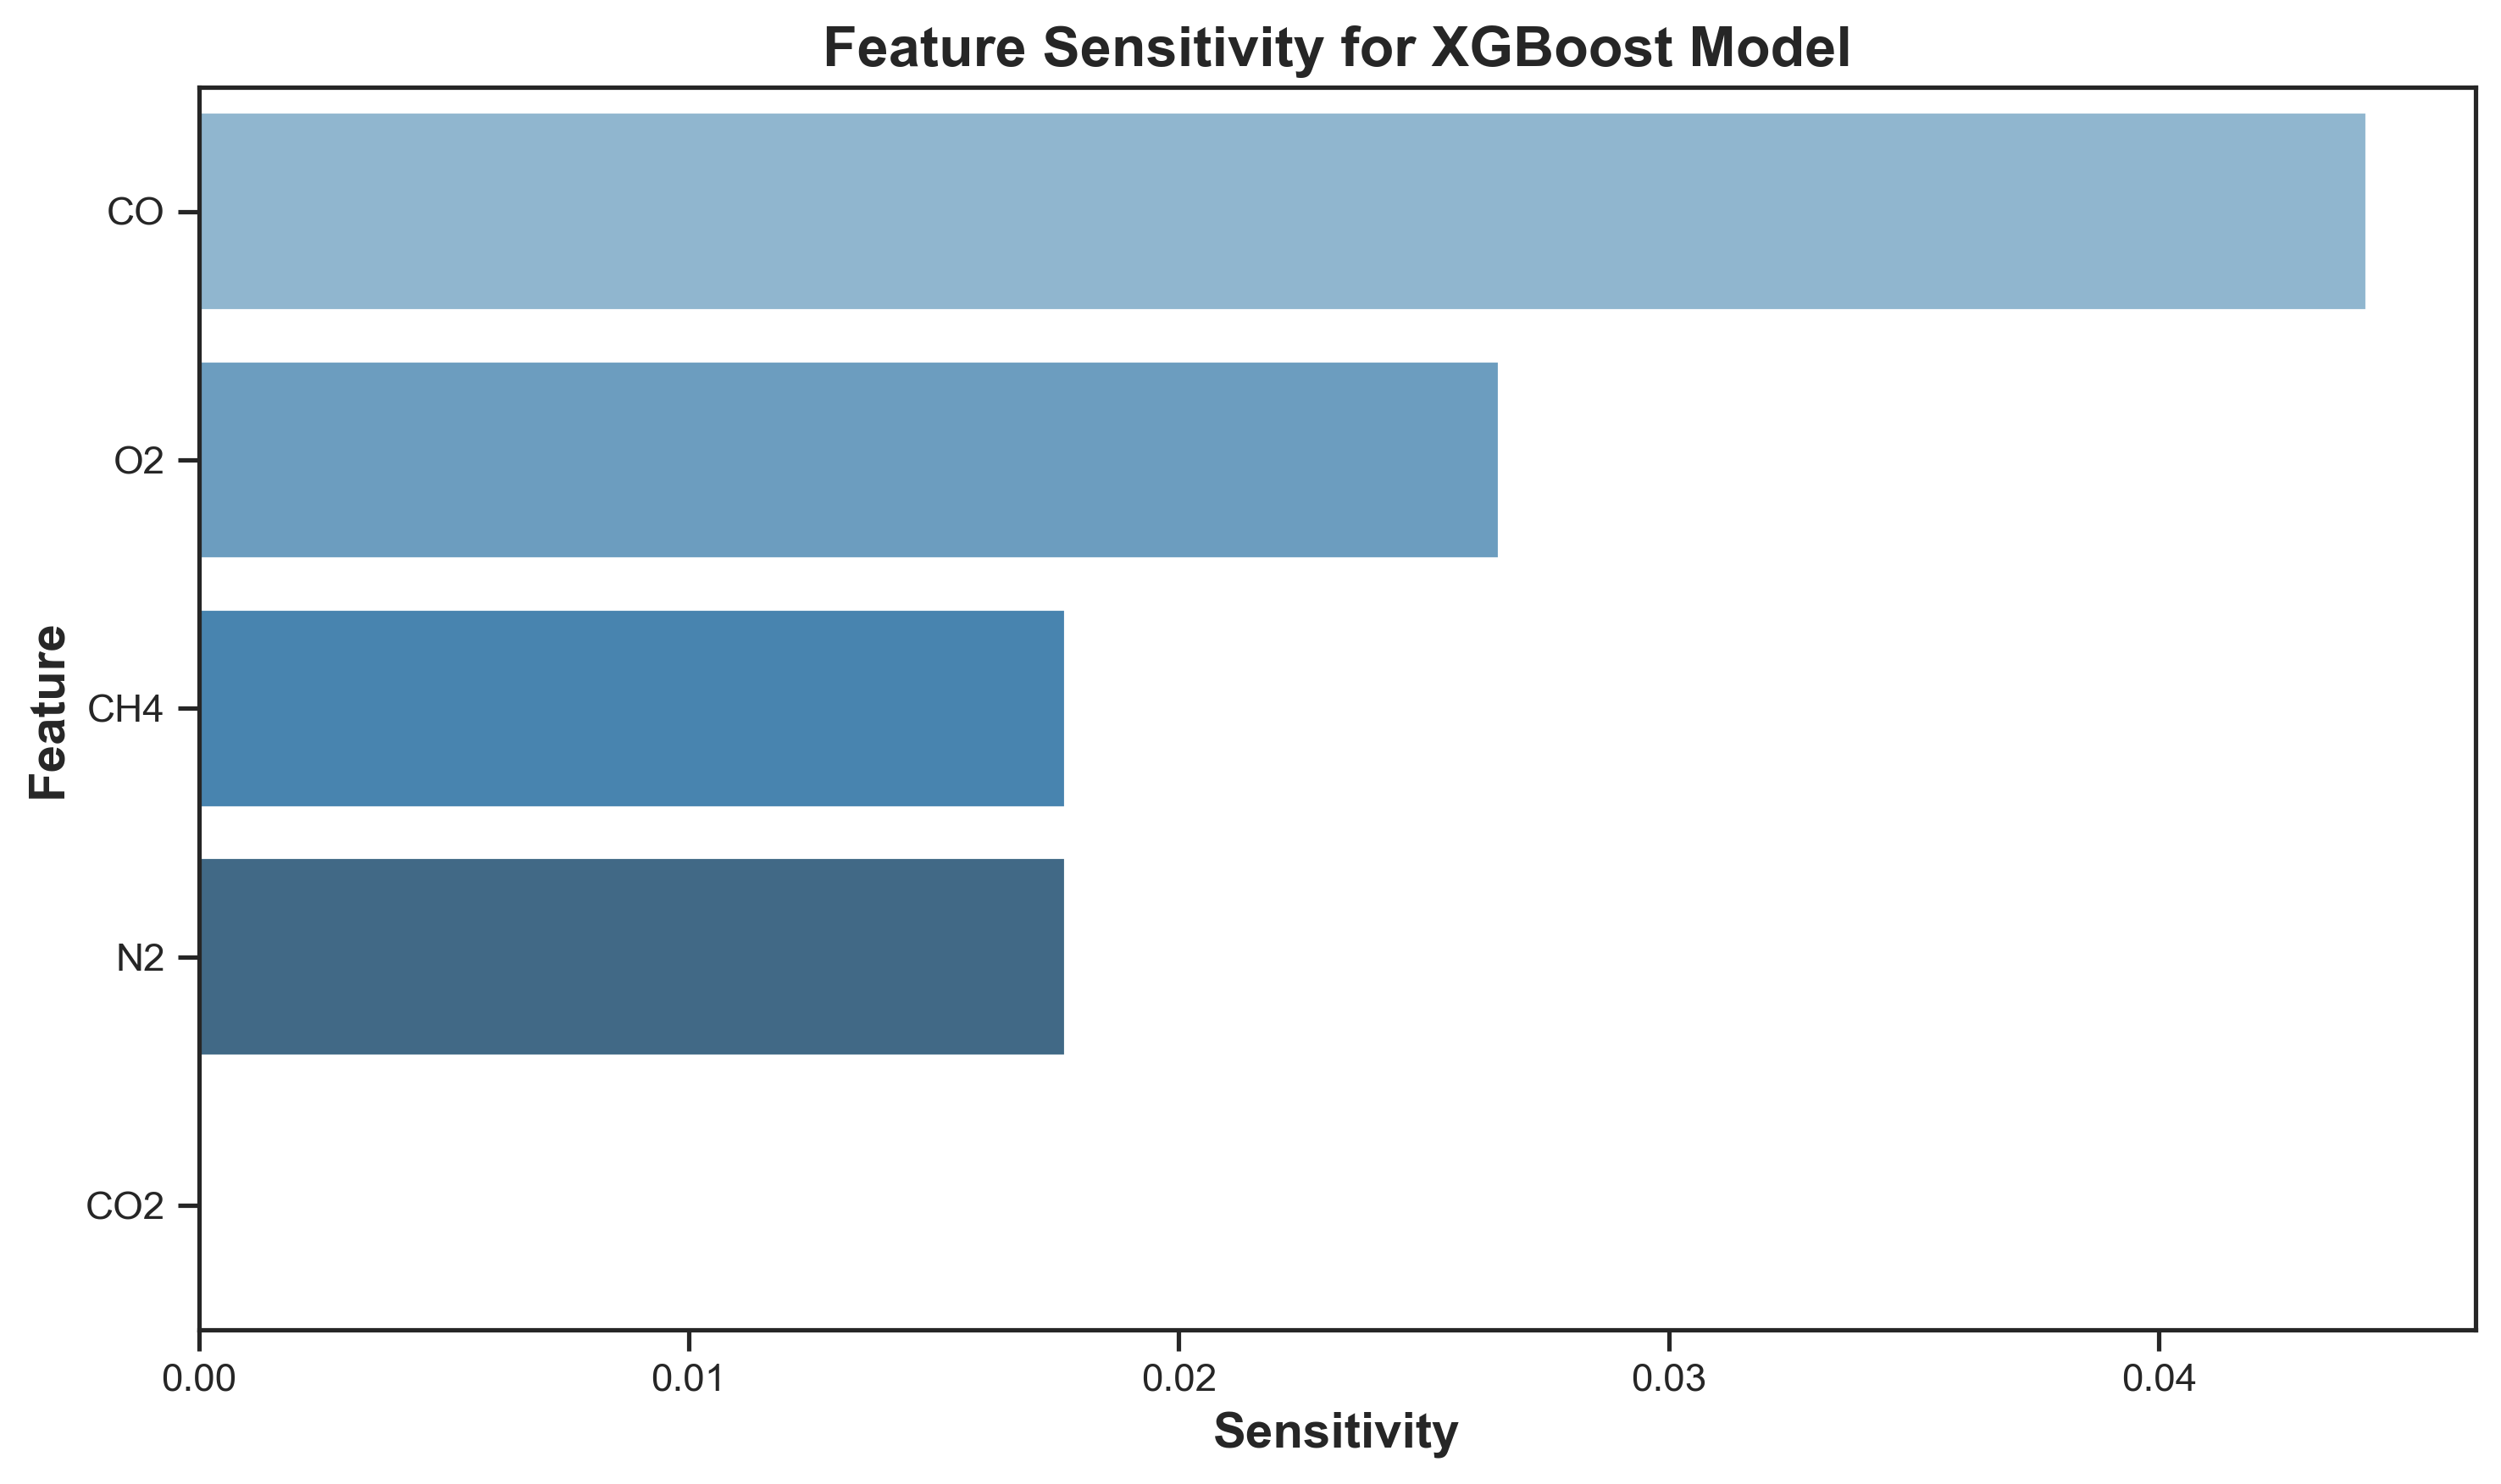

UsageError: Line magic function `%plt.figure(figsize=(10,` not found.


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
import shap
import xgboost as xgb

# Load the trained XGBoost model
model_name = 'xgboost'  # Example model name
xgboost_model = joblib.load(f'{model_name}_model.joblib')

# Assuming df is your dataframe and contains the features and target
X = df.drop(columns=['Class'])  # Replace with your actual feature DataFrame
y = df['Class']  # Replace with your target column

# Split the dataset into train and test sets
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Sensitivity Analysis for XGBoost Model

# Generate baseline predictions using the original data for XGBoost
baseline_prediction_xgb = xgboost_model.predict(X_train)

# Create a DataFrame to store the results for XGBoost
sensitivity_results_xgb = pd.DataFrame(columns=['Feature', 'Sensitivity'])

# Perturb each feature and measure the impact on predictions for XGBoost
for feature in X_train.columns:
    perturbation = X_train.copy()
    perturbation[feature] = perturbation[feature] * 1.1  # Increase feature by 10%
    
    # Predict after perturbing the feature
    perturbed_prediction_xgb = xgboost_model.predict(perturbation)
    
    # Calculate the change in prediction (sensitivity)
    sensitivity_xgb = np.mean(np.abs(baseline_prediction_xgb - perturbed_prediction_xgb))
    
    # Append the result
    sensitivity_results_xgb = sensitivity_results_xgb.append({
        'Feature': feature,
        'Sensitivity': sensitivity_xgb
    }, ignore_index=True)

# Sort by sensitivity for XGBoost
sensitivity_results_xgb = sensitivity_results_xgb.sort_values(by='Sensitivity', ascending=False)

# Plot Sensitivity Analysis Results for XGBoost Model
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(x='Sensitivity', y='Feature', data=sensitivity_results_xgb, palette='Blues_d')

# Beautify the plot for publication quality
plt.title("Feature Sensitivity for XGBoost Model", fontsize=16, fontweight='bold')
plt.xlabel("Sensitivity", fontsize=14, fontweight='bold')
plt.ylabel("Feature", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# If you want to perform SHAP analysis on XGBoost model:
explainer_xgb = shap.TreeExplainer(xgboost_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

# Plot SHAP values for XGBoost model
%plt.figure(figsize=(10, 6), dpi=300)
%shap.summary_plot(shap_values_xgb, X_train, plot_type='bar', show=False)

# Beautify the SHAP plot for publication quality
plt.title("Feature Importance Using SHAP for XGBoost Model", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
